In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
# 한글깨짐 방지
plt.rc('font', family='AppleGothic')

In [2]:
# ------------------------<game_info_df>--------------------------------------------------

In [3]:
# 1. games.csv 정리

In [4]:
games_df = pd.read_csv('./data/games.csv')

In [5]:
games_df.head()

game_id competition_id  season         round        date  home_club_id  \
0  2321044             L1    2013   2. Matchday  2013-08-18            16   
1  2321060             L1    2013   3. Matchday  2013-08-25            23   
2  2321086             L1    2013   6. Matchday  2013-09-21             4   
3  2321152             L1    2013  11. Matchday  2013-11-02            44   
4  2321205             L1    2013  17. Matchday  2013-12-21            41   

   away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
0            23                2                1                 1.0  ...   
1            24                0                2                18.0  ...   
2            16                1                1                15.0  ...   
3            33                0                2                 7.0  ...   
4            39                2                3                14.0  ...   

                 stadium attendance          referee  \
0      SIGNAL IDUNA PARK    80200.0     Peter Sippel   
1      EINTRACHT-Stadion    23325.0   Wolfgang Stark   
2    Max-Morlock-Stadion    50000.0     Knut Kircher   
3  Olympiastadion Berlin    69277.0      Günter Perl   
4       Volksparkstadion    50000.0  Bastian Dankert   

                                                 url  home_club_formation  \
0  https://www.transfermarkt.co.uk/borussia-dortm...              4-2-3-1   
1  https://www.transfermarkt.co.uk/eintracht-brau...              4-3-2-1   
2  https://www.transfermarkt.co.uk/1-fc-nuremberg...              4-2-3-1   
3  https://www.transfermarkt.co.uk/hertha-bsc_fc-...              4-2-3-1   
4  https://www.transfermarkt.co.uk/hamburger-sv_1...              4-2-3-1   

  away_club_formation          home_club_name  \
0             4-3-2-1       Borussia Dortmund   
1             4-2-3-1  Eintracht Braunschweig   
2             4-2-3-1          1.FC Nuremberg   
3             4-2-3-1              Hertha BSC   
4       4-4-2 Diamond            Hamburger SV   

                         away_club_name aggregate competition_type  
0                Eintracht Braunschweig       2:1  domestic_league  
1        Eintracht Frankfurt Fußball AG       0:2  domestic_league  
2                     Borussia Dortmund       1:1  domestic_league  
3                         FC Schalke 04       0:2  domestic_league  
4  1. Fußball- und Sportverein Mainz 05       2:3  domestic_league  

[5 rows x 23 columns]

In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67421 entries, 0 to 67420
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67421 non-null  int64  
 1   competition_id          67421 non-null  object 
 2   season                  67421 non-null  int64  
 3   round                   67421 non-null  object 
 4   date                    67421 non-null  object 
 5   home_club_id            67421 non-null  int64  
 6   away_club_id            67421 non-null  int64  
 7   home_club_goals         67421 non-null  int64  
 8   away_club_goals         67421 non-null  int64  
 9   home_club_position      47449 non-null  float64
 10  away_club_position      47449 non-null  float64
 11  home_club_manager_name  66675 non-null  object 
 12  away_club_manager_name  66675 non-null  object 
 13  stadium                 67207 non-null  object 
 14  attendance              57718 non-null

In [7]:
games_df.isnull().sum()

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        19972
away_club_position        19972
home_club_manager_name      746
away_club_manager_name      746
stadium                     214
attendance                 9703
referee                     598
url                           0
home_club_formation        6598
away_club_formation        6452
home_club_name            11450
away_club_name            10212
aggregate                     0
competition_type              0
dtype: int64

In [8]:
# 1) games_df의 competition_id == 'GB1' 이외의 행 삭제

In [9]:
games_df = games_df[games_df['competition_id'] == 'GB1']

In [10]:
# 2) date컬럼 날짜형식으로 바꾸고 2018-08-01 이후의 행만 남기고 삭제

In [11]:
# date컬럼 str -> datetime type으로 변형

games_df['date'] = pd.to_datetime(games_df['date'])

In [12]:
# 2018-08-01 이후의 행만 남기고 삭제

games_df = games_df[games_df['date'] >= '2018-08-01']

In [13]:
games_df.head()

game_id competition_id  season         round       date  home_club_id  \
1876  3050170            GB1    2018   1. Matchday 2018-08-11          1110   
1877  3050215            GB1    2018   5. Matchday 2018-09-15          1010   
1878  3050250            GB1    2018   9. Matchday 2018-10-20           631   
1879  3050264            GB1    2018  10. Matchday 2018-10-27           180   
1880  3050336            GB1    2018  17. Matchday 2018-12-15           543   

      away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
1876           631                0                3                19.0  ...   
1877           985                1                2                 4.0  ...   
1878           985                2                2                 3.0  ...   
1879           762                0                0                16.0  ...   
1880           989                2                0                 7.0  ...   

                   stadium attendance         referee  \
1876  John Smith's Stadium    24121.0  Chris Kavanagh   
1877         Vicarage Road    20537.0       Mike Dean   
1878       Stamford Bridge    40721.0       Mike Dean   
1879     St Mary's Stadium    30736.0  Chris Kavanagh   
1880      Molineux Stadium    30997.0    Simon Hooper   

                                                    url  home_club_formation  \
1876  https://www.transfermarkt.co.uk/huddersfield-t...           3-5-2 flat   
1877  https://www.transfermarkt.co.uk/watford-fc_man...                4-4-2   
1878  https://www.transfermarkt.co.uk/chelsea-fc_man...      4-3-3 Attacking   
1879  https://www.transfermarkt.co.uk/southampton-fc...       4-4-2 double 6   
1880  https://www.transfermarkt.co.uk/wolverhampton-...                3-5-2   

     away_club_formation                         home_club_name  \
1876     4-3-3 Attacking                      Huddersfield Town   
1877             4-2-3-1                             Watford FC   
1878     4-3-3 Attacking                  Chelsea Football Club   
1879      4-4-2 double 6                         Southampton FC   
1880             3-4-2-1  Wolverhampton Wanderers Football Club   

                             away_club_name aggregate competition_type  
1876                  Chelsea Football Club       0:3  domestic_league  
1877        Manchester United Football Club       1:2  domestic_league  
1878        Manchester United Football Club       2:2  domestic_league  
1879         Newcastle United Football Club       0:0  domestic_league  
1880  Association Football Club Bournemouth       2:0  domestic_league  

[5 rows x 23 columns]

In [14]:
# 홈, 원정경기 경기에 영향을 줄까?

In [15]:
def win_team(df):
    h_goal = df['home_club_goals']
    a_goal  = df['away_club_goals']
    if h_goal > a_goal:
        return 'home'
    elif h_goal < a_goal:
        return 'away'
    else:
        return 'tie'

In [16]:
games_df['win_team'] = games_df.apply(win_team, axis=1)

In [17]:
games_df.head()

game_id competition_id  season         round       date  home_club_id  \
1876  3050170            GB1    2018   1. Matchday 2018-08-11          1110   
1877  3050215            GB1    2018   5. Matchday 2018-09-15          1010   
1878  3050250            GB1    2018   9. Matchday 2018-10-20           631   
1879  3050264            GB1    2018  10. Matchday 2018-10-27           180   
1880  3050336            GB1    2018  17. Matchday 2018-12-15           543   

      away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
1876           631                0                3                19.0  ...   
1877           985                1                2                 4.0  ...   
1878           985                2                2                 3.0  ...   
1879           762                0                0                16.0  ...   
1880           989                2                0                 7.0  ...   

      attendance         referee  \
1876     24121.0  Chris Kavanagh   
1877     20537.0       Mike Dean   
1878     40721.0       Mike Dean   
1879     30736.0  Chris Kavanagh   
1880     30997.0    Simon Hooper   

                                                    url home_club_formation  \
1876  https://www.transfermarkt.co.uk/huddersfield-t...          3-5-2 flat   
1877  https://www.transfermarkt.co.uk/watford-fc_man...               4-4-2   
1878  https://www.transfermarkt.co.uk/chelsea-fc_man...     4-3-3 Attacking   
1879  https://www.transfermarkt.co.uk/southampton-fc...      4-4-2 double 6   
1880  https://www.transfermarkt.co.uk/wolverhampton-...               3-5-2   

      away_club_formation                         home_club_name  \
1876      4-3-3 Attacking                      Huddersfield Town   
1877              4-2-3-1                             Watford FC   
1878      4-3-3 Attacking                  Chelsea Football Club   
1879       4-4-2 double 6                         Southampton FC   
1880              3-4-2-1  Wolverhampton Wanderers Football Club   

                             away_club_name aggregate competition_type  \
1876                  Chelsea Football Club       0:3  domestic_league   
1877        Manchester United Football Club       1:2  domestic_league   
1878        Manchester United Football Club       2:2  domestic_league   
1879         Newcastle United Football Club       0:0  domestic_league   
1880  Association Football Club Bournemouth       2:0  domestic_league   

     win_team  
1876     away  
1877     away  
1878      tie  
1879      tie  
1880     home  

[5 rows x 24 columns]

In [18]:
game_result = games_df['win_team'].value_counts()

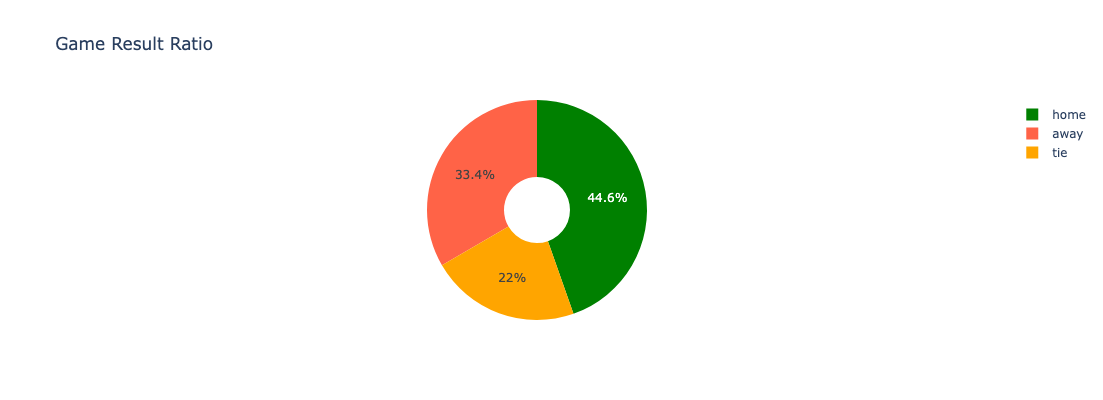

In [19]:
# home-away 비율 그래프
fig = px.pie(game_result, values=game_result, names=game_result.index,
             title='Game Result Ratio', color_discrete_sequence=['green', 'tomato', 'orange'],  
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [20]:
# 2018~2023 어느팀이 가장 많이 승리를 했나?

In [21]:
club_games_df = pd.read_csv('./data/club_games.csv')

In [22]:
club_games_df.head()

game_id  club_id  own_goals  own_position      own_manager_name  \
0  2320450     1468          0           NaN     Holger Bachthaler   
1  2320460        1          3           NaN       Jürgen Luginger   
2  2320472     2036          4           NaN         Frank Schmidt   
3  2321044       16          2           1.0          Jürgen Klopp   
4  2321060       23          0          18.0  Torsten Lieberknecht   

   opponent_id  opponent_goals  opponent_position opponent_manager_name  \
0           24               2                NaN             Armin Veh   
1           86               1                NaN            Robin Dutt   
2           72               5                NaN     Alexander Schmidt   
3           23               1               15.0  Torsten Lieberknecht   
4           24               2               11.0             Armin Veh   

  hosting  is_win  
0    Home       0  
1    Home       1  
2    Home       0  
3    Home       1  
4    Home       0

In [23]:
club_games_df = club_games_df[club_games_df['game_id'].isin(games_df['game_id'])]

In [24]:
club_games_df

game_id  club_id  own_goals  own_position own_manager_name  \
2097    3050170     1110          0          19.0     David Wagner   
2098    3050190     1110          0          19.0     David Wagner   
2099    3050199      603          2          16.0     Neil Warnock   
2100    3050215     1010          1           4.0      Javi Gracia   
2101    3050250      631          2           3.0   Maurizio Sarri   
...         ...      ...        ...           ...              ...   
134815  3429732      350          0          20.0     Chris Wilder   
134816  3429776      399          2          11.0   Marcelo Bielsa   
134818  3592178       31          2           2.0     Jürgen Klopp   
134821  4095319     1148          2          14.0     Thomas Frank   
134822  3219126     1010          1          17.0    Nigel Pearson   

        opponent_id  opponent_goals  opponent_position opponent_manager_name  \
2097            631               3                2.0        Maurizio Sarri   
2098            603               0               15.0          Neil Warnock   
2099             11               3                9.0            Unai Emery   
2100            985               2                8.0         José Mourinho   
2101            985               2               10.0         José Mourinho   
...             ...             ...                ...                   ...   
134815          379               3                5.0           David Moyes   
134816          931               1               18.0          Scott Parker   
134818          405               1               15.0        Steven Gerrard   
134821          543               0               11.0           Gary O'Neil   
134822          379               3               15.0           David Moyes   

       hosting  is_win  
2097      Home       0  
2098      Home       0  
2099      Home       0  
2100      Home       0  
2101      Home       0  
...        ...     ...  
134815    Away       0  
134816    Away       1  
134818    Away       1  
134821    Away       1  
134822    Away       0  

[4366 rows x 11 columns]

In [25]:
club_games_df.groupby('club_id')['is_win'].sum()

club_id
11      121
29       72
31      148
148     113
180      51
281     161
350      24
379      83
399      34
405      73
543      81
603      10
631     103
703      15
762      79
873      66
931      38
984       5
985     112
989      42
1003     76
1010     28
1031      5
1110      3
1123     10
1132     47
1148     35
1237     68
Name: is_win, dtype: int64

In [26]:
clubs_df = pd.read_csv('./data/clubs.csv')

In [27]:
clubs_df.head()

club_id          club_code                              name  \
0      105    sv-darmstadt-98  Sportverein Darmstadt 1898 e. V.   
1    11127  ural-ekaterinburg             FK Ural Yekaterinburg   
2      114  besiktas-istanbul         Beşiktaş Jimnastik Kulübü   
3       12             as-rom        Associazione Sportiva Roma   
4      148  tottenham-hotspur   Tottenham Hotspur Football Club   

  domestic_competition_id  total_market_value  squad_size  average_age  \
0                      L1                 NaN          31         26.6   
1                     RU1                 NaN          27         27.9   
2                     TR1                 NaN          35         26.7   
3                     IT1                 NaN          26         26.9   
4                     GB1                 NaN          26         25.4   

   foreigners_number  foreigners_percentage  national_team_players  \
0                 11                   35.5                      1   
1                 15                   55.6                      6   
2                 17                   48.6                     13   
3                 18                   69.2                     16   
4                 20                   76.9                     21   

                     stadium_name  stadium_seats net_transfer_record  \
0  Merck-Stadion am Böllenfalltor          17810             €-1.48m   
1             Yekaterinburg Arena          23000              €-895k   
2                 Tüpraş Stadyumu          42590            €-26.00m   
3                Olimpico di Roma          73261            +€63.00m   
4       Tottenham Hotspur Stadium          62850           €-151.40m   

   coach_name  last_season                                           filename  \
0         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
1         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
2         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
3         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
4         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   

                                                 url  
0  https://www.transfermarkt.co.uk/sv-darmstadt-9...  
1  https://www.transfermarkt.co.uk/ural-ekaterinb...  
2  https://www.transfermarkt.co.uk/besiktas-istan...  
3  https://www.transfermarkt.co.uk/as-rom/startse...  
4  https://www.transfermarkt.co.uk/tottenham-hots...

In [28]:
club_games_df = pd.merge(club_games_df, clubs_df[['club_id', 'name']], on='club_id', how='left')

In [29]:
wins_count = club_games_df.groupby('name')['is_win'].sum().sort_values(ascending=False)
pd.DataFrame(wins_count)

is_win
name                                          
Manchester City Football Club              161
Liverpool Football Club                    148
Arsenal Football Club                      121
Tottenham Hotspur Football Club            113
Manchester United Football Club            112
Chelsea Football Club                      103
West Ham United Football Club               83
Wolverhampton Wanderers Football Club       81
Newcastle United Football Club              79
Leicester City                              76
Aston Villa Football Club                   73
Everton Football Club                       72
Brighton and Hove Albion Football Club      68
Crystal Palace Football Club                66
Southampton FC                              51
Burnley Football Club                       47
Association Football Club Bournemouth       42
Fulham Football Club                        38
Brentford Football Club                     35
Leeds United                                34
Watford FC                                  28
Sheffield United Football Club              24
Nottingham Forest Football Club             15
Norwich City                                10
Cardiff City                                10
West Bromwich Albion                         5
Luton Town Football Club                     5
Huddersfield Town                            3

In [30]:
wins_count_df = pd.DataFrame(wins_count).head(10)

In [31]:
wins_count_df

is_win
name                                         
Manchester City Football Club             161
Liverpool Football Club                   148
Arsenal Football Club                     121
Tottenham Hotspur Football Club           113
Manchester United Football Club           112
Chelsea Football Club                     103
West Ham United Football Club              83
Wolverhampton Wanderers Football Club      81
Newcastle United Football Club             79
Leicester City                             76

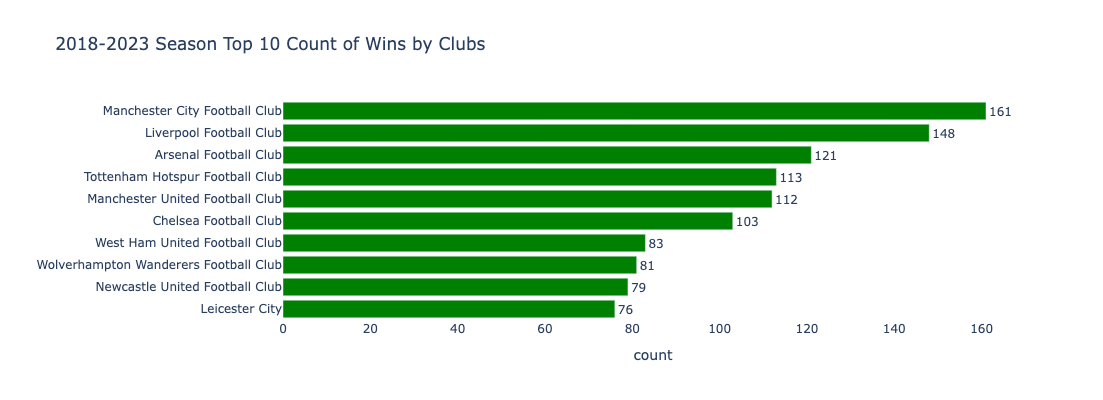

In [32]:
fig = px.bar(wins_count_df, x='is_win', y=wins_count_df.index, 
             title='2018-2023 Season Top 10 Count of Wins by Clubs',
             color=wins_count_df.index,
             text='is_win',
             color_discrete_sequence=['green'])  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='count',  
    yaxis_title='',  
    width=900,  
    height=400,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [33]:
club_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                4366 non-null   int64  
 1   club_id                4366 non-null   int64  
 2   own_goals              4366 non-null   int64  
 3   own_position           4366 non-null   float64
 4   own_manager_name       4366 non-null   object 
 5   opponent_id            4366 non-null   int64  
 6   opponent_goals         4366 non-null   int64  
 7   opponent_position      4366 non-null   float64
 8   opponent_manager_name  4366 non-null   object 
 9   hosting                4366 non-null   object 
 10  is_win                 4366 non-null   int64  
 11  name                   4366 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 409.4+ KB


In [34]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   competition_id          2183 non-null   object        
 2   season                  2183 non-null   int64         
 3   round                   2183 non-null   object        
 4   date                    2183 non-null   datetime64[ns]
 5   home_club_id            2183 non-null   int64         
 6   away_club_id            2183 non-null   int64         
 7   home_club_goals         2183 non-null   int64         
 8   away_club_goals         2183 non-null   int64         
 9   home_club_position      2183 non-null   float64       
 10  away_club_position      2183 non-null   float64       
 11  home_club_manager_name  2183 non-null   object        
 12  away_club_manager_name  2183 non-null   object   

In [35]:
games_df.groupby('home_club_id')['home_club_position'].unique()

home_club_id
11      [5.0, 4.0, 1.0, 10.0, 9.0, 8.0, 2.0, 12.0, 11....
29      [14.0, 15.0, 19.0, 10.0, 11.0, 16.0, 17.0, 8.0...
31      [1.0, 4.0, 8.0, 2.0, 7.0, 5.0, 3.0, 9.0, 6.0, ...
148     [6.0, 8.0, 5.0, 3.0, 7.0, 10.0, 14.0, 1.0, 4.0...
180     [16.0, 13.0, 15.0, 20.0, 14.0, 18.0, 9.0, 17.0...
281         [3.0, 2.0, 1.0, 7.0, 5.0, 4.0, 8.0, 9.0, 6.0]
350     [9.0, 20.0, 14.0, 6.0, 12.0, 7.0, 19.0, 15.0, ...
379     [9.0, 4.0, 5.0, 8.0, 10.0, 16.0, 15.0, 1.0, 12...
399     [13.0, 16.0, 10.0, 11.0, 17.0, 12.0, 14.0, 8.0...
405     [19.0, 17.0, 2.0, 9.0, 11.0, 7.0, 10.0, 5.0, 4...
543     [7.0, 8.0, 17.0, 19.0, 14.0, 9.0, 13.0, 20.0, ...
603                  [16.0, 19.0, 18.0, 20.0, 17.0, 14.0]
631     [3.0, 4.0, 6.0, 11.0, 13.0, 1.0, 5.0, 10.0, 2....
703     [14.0, 16.0, 17.0, 18.0, 15.0, 19.0, 13.0, 10....
762     [12.0, 3.0, 13.0, 16.0, 14.0, 15.0, 20.0, 11.0...
873     [14.0, 13.0, 10.0, 16.0, 15.0, 9.0, 12.0, 19.0...
931     [17.0, 9.0, 8.0, 18.0, 12.0, 19.0, 20.0, 15.0,...
9

In [36]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   competition_id          2183 non-null   object        
 2   season                  2183 non-null   int64         
 3   round                   2183 non-null   object        
 4   date                    2183 non-null   datetime64[ns]
 5   home_club_id            2183 non-null   int64         
 6   away_club_id            2183 non-null   int64         
 7   home_club_goals         2183 non-null   int64         
 8   away_club_goals         2183 non-null   int64         
 9   home_club_position      2183 non-null   float64       
 10  away_club_position      2183 non-null   float64       
 11  home_club_manager_name  2183 non-null   object        
 12  away_club_manager_name  2183 non-null   object   

In [37]:
# game에서 랭킹이 더 높은 팀 컬럼 만들기

def comparison(df):
    if df['home_club_position'] > df['away_club_position'] : 
        return 'away'
    elif df['home_club_position'] < df['away_club_position'] :
        return 'home'

In [38]:
games_df['rank_compare'] = games_df.apply(comparison, axis=1)

In [39]:
games_df.head()

game_id competition_id  season         round       date  home_club_id  \
1876  3050170            GB1    2018   1. Matchday 2018-08-11          1110   
1877  3050215            GB1    2018   5. Matchday 2018-09-15          1010   
1878  3050250            GB1    2018   9. Matchday 2018-10-20           631   
1879  3050264            GB1    2018  10. Matchday 2018-10-27           180   
1880  3050336            GB1    2018  17. Matchday 2018-12-15           543   

      away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
1876           631                0                3                19.0  ...   
1877           985                1                2                 4.0  ...   
1878           985                2                2                 3.0  ...   
1879           762                0                0                16.0  ...   
1880           989                2                0                 7.0  ...   

             referee                                                url  \
1876  Chris Kavanagh  https://www.transfermarkt.co.uk/huddersfield-t...   
1877       Mike Dean  https://www.transfermarkt.co.uk/watford-fc_man...   
1878       Mike Dean  https://www.transfermarkt.co.uk/chelsea-fc_man...   
1879  Chris Kavanagh  https://www.transfermarkt.co.uk/southampton-fc...   
1880    Simon Hooper  https://www.transfermarkt.co.uk/wolverhampton-...   

     home_club_formation away_club_formation  \
1876          3-5-2 flat     4-3-3 Attacking   
1877               4-4-2             4-2-3-1   
1878     4-3-3 Attacking     4-3-3 Attacking   
1879      4-4-2 double 6      4-4-2 double 6   
1880               3-5-2             3-4-2-1   

                             home_club_name  \
1876                      Huddersfield Town   
1877                             Watford FC   
1878                  Chelsea Football Club   
1879                         Southampton FC   
1880  Wolverhampton Wanderers Football Club   

                             away_club_name aggregate competition_type  \
1876                  Chelsea Football Club       0:3  domestic_league   
1877        Manchester United Football Club       1:2  domestic_league   
1878        Manchester United Football Club       2:2  domestic_league   
1879         Newcastle United Football Club       0:0  domestic_league   
1880  Association Football Club Bournemouth       2:0  domestic_league   

     win_team rank_compare  
1876     away         away  
1877     away         home  
1878      tie         home  
1879      tie         home  
1880     home         home  

[5 rows x 25 columns]

In [40]:
# 랭킹이 더 낮은데 이긴 비율

In [41]:
def make_compare_df(df):
    if df['rank_compare'] == df['win_team']:
        return 'Favorites Winning'
    elif (df['rank_compare'] != df['win_team']) & (df['win_team'] == 'tie'):
        return 'tie'
    elif (df['rank_compare'] != df['win_team']) & (df['win_team'] != 'tie'):
        return 'underdog'

In [42]:
games_df['outcome_by_rank'] = games_df.apply(make_compare_df, axis=1)

In [43]:
games_df.head()

game_id competition_id  season         round       date  home_club_id  \
1876  3050170            GB1    2018   1. Matchday 2018-08-11          1110   
1877  3050215            GB1    2018   5. Matchday 2018-09-15          1010   
1878  3050250            GB1    2018   9. Matchday 2018-10-20           631   
1879  3050264            GB1    2018  10. Matchday 2018-10-27           180   
1880  3050336            GB1    2018  17. Matchday 2018-12-15           543   

      away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
1876           631                0                3                19.0  ...   
1877           985                1                2                 4.0  ...   
1878           985                2                2                 3.0  ...   
1879           762                0                0                16.0  ...   
1880           989                2                0                 7.0  ...   

                                                    url home_club_formation  \
1876  https://www.transfermarkt.co.uk/huddersfield-t...          3-5-2 flat   
1877  https://www.transfermarkt.co.uk/watford-fc_man...               4-4-2   
1878  https://www.transfermarkt.co.uk/chelsea-fc_man...     4-3-3 Attacking   
1879  https://www.transfermarkt.co.uk/southampton-fc...      4-4-2 double 6   
1880  https://www.transfermarkt.co.uk/wolverhampton-...               3-5-2   

     away_club_formation                         home_club_name  \
1876     4-3-3 Attacking                      Huddersfield Town   
1877             4-2-3-1                             Watford FC   
1878     4-3-3 Attacking                  Chelsea Football Club   
1879      4-4-2 double 6                         Southampton FC   
1880             3-4-2-1  Wolverhampton Wanderers Football Club   

                             away_club_name aggregate competition_type  \
1876                  Chelsea Football Club       0:3  domestic_league   
1877        Manchester United Football Club       1:2  domestic_league   
1878        Manchester United Football Club       2:2  domestic_league   
1879         Newcastle United Football Club       0:0  domestic_league   
1880  Association Football Club Bournemouth       2:0  domestic_league   

     win_team rank_compare    outcome_by_rank  
1876     away         away  Favorites Winning  
1877     away         home           underdog  
1878      tie         home                tie  
1879      tie         home                tie  
1880     home         home  Favorites Winning  

[5 rows x 26 columns]

In [44]:
result_by_rank = games_df['outcome_by_rank'].value_counts()
pd.DataFrame(result_by_rank)

count
outcome_by_rank         
Favorites Winning   1327
tie                  480
underdog             376

In [45]:
# 여기서 살짝 의문 position으로 랭킹을 비교했는데 이게 맞는건가?
# 상엽님한테 한 번 물어보고 얼마를 주기로 랭킹을 체크하는지 확인하기

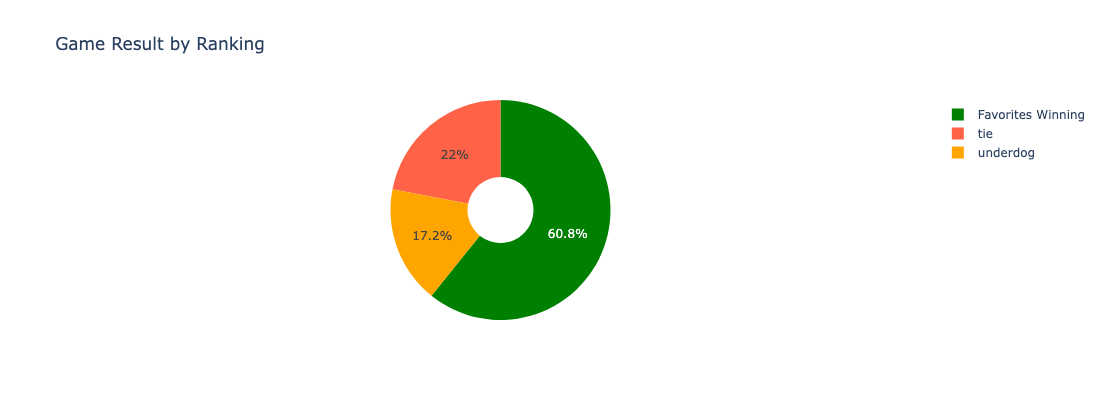

In [46]:
# home-away 비율 그래프
fig = px.pie(result_by_rank, values=result_by_rank, names=result_by_rank.index,
             title='Game Result by Ranking', color_discrete_sequence=['green', 'tomato', 'orange'],  
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [47]:
games_df

game_id competition_id  season         round       date  home_club_id  \
1876   3050170            GB1    2018   1. Matchday 2018-08-11          1110   
1877   3050215            GB1    2018   5. Matchday 2018-09-15          1010   
1878   3050250            GB1    2018   9. Matchday 2018-10-20           631   
1879   3050264            GB1    2018  10. Matchday 2018-10-27           180   
1880   3050336            GB1    2018  17. Matchday 2018-12-15           543   
...        ...            ...     ...           ...        ...           ...   
66901  3050278            GB1    2018  12. Matchday 2018-11-10           603   
66913  3421741            GB1    2020   7. Matchday 2020-11-01           148   
66914  3429714            GB1    2020  23. Matchday 2021-02-06          1132   
67152  3429694            GB1    2020  21. Matchday 2021-01-31          1237   
67160  3592240            GB1    2021  37. Matchday 2022-05-15           148   

       away_club_id  home_club_goals  away_club_goals  home_club_position  \
1876            631                0                3                19.0   
1877            985                1                2                 4.0   
1878            985                2                2                 3.0   
1879            762                0                0                16.0   
1880            989                2                0                 7.0   
...             ...              ...              ...                 ...   
66901          1237                2                1                18.0   
66913          1237                2                1                 3.0   
66914          1237                1                1                17.0   
67152           148                1                0                17.0   
67160          1132                1                0                 4.0   

       ...                                                url  \
1876   ...  https://www.transfermarkt.co.uk/huddersfield-t...   
1877   ...  https://www.transfermarkt.co.uk/watford-fc_man...   
1878   ...  https://www.transfermarkt.co.uk/chelsea-fc_man...   
1879   ...  https://www.transfermarkt.co.uk/southampton-fc...   
1880   ...  https://www.transfermarkt.co.uk/wolverhampton-...   
...    ...                                                ...   
66901  ...  https://www.transfermarkt.co.uk/cardiff-city_b...   
66913  ...  https://www.transfermarkt.co.uk/tottenham-hots...   
66914  ...  https://www.transfermarkt.co.uk/burnley-fc_bri...   
67152  ...  https://www.transfermarkt.co.uk/brighton-amp-h...   
67160  ...  https://www.transfermarkt.co.uk/tottenham-hots...   

      home_club_formation away_club_formation  \
1876           3-5-2 flat     4-3-3 Attacking   
1877                4-4-2             4-2-3-1   
1878      4-3-3 Attacking     4-3-3 Attacking   
1879       4-4-2 double 6      4-4-2 double 6   
1880                3-5-2             3-4-2-1   
...                   ...                 ...   
66901     4-3-3 Attacking             4-2-3-1   
66913             4-2-3-1          3-5-2 flat   
66914      4-4-2 double 6               5-3-2   
67152             3-4-2-1             3-4-2-1   
67160               5-4-1               5-3-2   

                               home_club_name  \
1876                        Huddersfield Town   
1877                               Watford FC   
1878                    Chelsea Football Club   
1879                           Southampton FC   
1880    Wolverhampton Wanderers Football Club   
...                                       ...   
66901                            Cardiff City   
66913         Tottenham Hotspur Football Club   
66914                   Burnley Football Club   
67152  Brighton and Hove Albion Football Club   
67160         Tottenham Hotspur Football Club   

                               away_club_name aggregate competition_type  \
1876                    Chelsea Football Club       0:3  domestic_league   
1877      

In [48]:
club_games_df

game_id  club_id  own_goals  own_position own_manager_name  opponent_id  \
0     3050170     1110          0          19.0     David Wagner          631   
1     3050190     1110          0          19.0     David Wagner          603   
2     3050199      603          2          16.0     Neil Warnock           11   
3     3050215     1010          1           4.0      Javi Gracia          985   
4     3050250      631          2           3.0   Maurizio Sarri          985   
...       ...      ...        ...           ...              ...          ...   
4361  3429732      350          0          20.0     Chris Wilder          379   
4362  3429776      399          2          11.0   Marcelo Bielsa          931   
4363  3592178       31          2           2.0     Jürgen Klopp          405   
4364  4095319     1148          2          14.0     Thomas Frank          543   
4365  3219126     1010          1          17.0    Nigel Pearson          379   

      opponent_goals  opponent_position opponent_manager_name hosting  is_win  \
0                  3                2.0        Maurizio Sarri    Home       0   
1                  0               15.0          Neil Warnock    Home       0   
2                  3                9.0            Unai Emery    Home       0   
3                  2                8.0         José Mourinho    Home       0   
4                  2               10.0         José Mourinho    Home       0   
...              ...                ...                   ...     ...     ...   
4361               3                5.0           David Moyes    Away       0   
4362               1               18.0          Scott Parker    Away       1   
4363               1               15.0        Steven Gerrard    Away       1   
4364               0               11.0           Gary O'Neil    Away       1   
4365               3               15.0           David Moyes    Away       0   

                                name  
0                  Huddersfield Town  
1                  Huddersfield Town  
2                       Cardiff City  
3                         Watford FC  
4              Chelsea Football Club  
...                              ...  
4361  Sheffield United Football Club  
4362                    Leeds United  
4363         Liverpool Football Club  
4364         Brentford Football Club  
4365                      Watford FC  

[4366 rows x 12 columns]

In [49]:
club_games_df = pd.merge(games_df[['game_id', 'season']], club_games_df, on='game_id')

In [50]:
club_games_df.head()

game_id  season  club_id  own_goals  own_position own_manager_name  \
0  3050170    2018     1110          0          19.0     David Wagner   
1  3050170    2018      631          3           2.0   Maurizio Sarri   
2  3050215    2018     1010          1           4.0      Javi Gracia   
3  3050215    2018      985          2           8.0    José Mourinho   
4  3050250    2018      631          2           3.0   Maurizio Sarri   

   opponent_id  opponent_goals  opponent_position opponent_manager_name  \
0          631               3                2.0        Maurizio Sarri   
1         1110               0               19.0          David Wagner   
2          985               2                8.0         José Mourinho   
3         1010               1                4.0           Javi Gracia   
4          985               2               10.0         José Mourinho   

  hosting  is_win                             name  
0    Home       0                Huddersfield Town  
1    Away       1            Chelsea Football Club  
2    Home       0                       Watford FC  
3    Away       1  Manchester United Football Club  
4    Home       0            Chelsea Football Club

In [51]:
club_games_df.groupby(['name', 'season'])['own_position']

In [52]:
club_games_df.sort_values(['name', 'season']).head(50)

game_id  season  club_id  own_goals  own_position own_manager_name  \
137   3050180    2018       11          2          17.0       Unai Emery   
139   3050259    2018       11          2           4.0       Unai Emery   
277   3050199    2018       11          3           9.0       Unai Emery   
299   3050453    2018       11          1           6.0       Unai Emery   
412   3050227    2018       11          2           5.0       Unai Emery   
426   3050427    2018       11          2           5.0       Unai Emery   
693   3050333    2018       11          2           5.0       Unai Emery   
767   3050562    2018       11          3           5.0       Unai Emery   
804   3050267    2018       11          1           5.0       Unai Emery   
810   3050437    2018       11          5           4.0       Unai Emery   
906   3050357    2018       11          4           5.0       Unai Emery   
996   3050337    2018       11          3           5.0       Unai Emery   
1047  3050240    2018       11          5           4.0       Unai Emery   
1309  3050287    2018       11          2           5.0       Unai Emery   
1728  3050297    2018       11          4           4.0       Unai Emery   
1834  3050167    2018       11          0          15.0       Unai Emery   
1839  3050212    2018       11          2           7.0       Unai Emery   
2088  3050247    2018       11          3           4.0       Unai Emery   
2095  3050404    2018       11          1           6.0       Unai Emery   
2099  3050484    2018       11          1           4.0       Unai Emery   
2362  3050523    2018       11          2           5.0       Unai Emery   
2655  3050497    2018       11          0           5.0       Unai Emery   
2884  3050317    2018       11          1           5.0       Unai Emery   
2887  3050376    2018       11          0           5.0       Unai Emery   
2898  3050457    2018       11          2           4.0       Unai Emery   
3090  3050387    2018       11          2           4.0       Unai Emery   
3205  3050410    2018       11          2           5.0       Unai Emery   
3378  3050551    2018       11          1           5.0       Unai Emery   
3472  3050187    2018       11          3           9.0       Unai Emery   
3478  3050217    2018       11          2           6.0       Unai Emery   
3653  3050417    2018       11          1           5.0       Unai Emery   
3760  3050485    2018       11          2           4.0       Unai Emery   
3769  3050537    2018       11          0           5.0       Unai Emery   
4012  3050277    2018       11          1           5.0       Unai Emery   
4024  3050377    2018       11          2           5.0       Unai Emery   
4035  3050522    2018       11          1           4.0       Unai Emery   
4037  3056407    2018       11          2           5.0       Unai Emery   
4319  3050352    2018       11          1           5.0       Unai Emery   
34    3219371    2019       11          1           5.0       Unai Emery   
147   3219165    2019       11          2           9.0     Mikel Arteta   
149   3219249    2019       11          2          10.0     Mikel Arteta   
335   3194824    2019       11          1           7.0       Unai Emery   
338   3219152    2019       11          2           9.0     Mikel Arteta   
540   3219173    2019       11          4           8.0     Mikel Arteta   
839   3219386    2019       11          0           5.0       Unai Emery   
1344  3219183    2019       11          3           9.0     Mikel Arteta   
1611  3219101    2019       11          0          10.0     Mikel Arteta   
1632  3219357    2019       11          2           8.0       Unai Emery   
1748  3219095    2019       11          2           2.0       Unai Emery   
1860  3219279    2019       11          1          12.0     Mikel Arteta   

      opponent_id  opponent_goals  opponent_position opponent_manager_name  \
137           631               3                3.

In [53]:
club_games_df.pivot_table(index=['name', 'season'], values='own_position')

own_position
name                                  season              
Arsenal Football Club                 2018        5.657895
                                      2019        7.921053
                                      2020       10.315789
                                      2021        7.184211
                                      2022        1.289474
...                                                    ...
Wolverhampton Wanderers Football Club 2019        8.631579
                                      2020       11.947368
                                      2021        9.263158
                                      2022       15.815789
                                      2023       12.535714

[120 rows x 1 columns]

In [54]:
# .... 어떻게 하는거지? 모르겠네

In [55]:
clubs_df.head()

club_id          club_code                              name  \
0      105    sv-darmstadt-98  Sportverein Darmstadt 1898 e. V.   
1    11127  ural-ekaterinburg             FK Ural Yekaterinburg   
2      114  besiktas-istanbul         Beşiktaş Jimnastik Kulübü   
3       12             as-rom        Associazione Sportiva Roma   
4      148  tottenham-hotspur   Tottenham Hotspur Football Club   

  domestic_competition_id  total_market_value  squad_size  average_age  \
0                      L1                 NaN          31         26.6   
1                     RU1                 NaN          27         27.9   
2                     TR1                 NaN          35         26.7   
3                     IT1                 NaN          26         26.9   
4                     GB1                 NaN          26         25.4   

   foreigners_number  foreigners_percentage  national_team_players  \
0                 11                   35.5                      1   
1                 15                   55.6                      6   
2                 17                   48.6                     13   
3                 18                   69.2                     16   
4                 20                   76.9                     21   

                     stadium_name  stadium_seats net_transfer_record  \
0  Merck-Stadion am Böllenfalltor          17810             €-1.48m   
1             Yekaterinburg Arena          23000              €-895k   
2                 Tüpraş Stadyumu          42590            €-26.00m   
3                Olimpico di Roma          73261            +€63.00m   
4       Tottenham Hotspur Stadium          62850           €-151.40m   

   coach_name  last_season                                           filename  \
0         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
1         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
2         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
3         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
4         NaN         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   

                                                 url  
0  https://www.transfermarkt.co.uk/sv-darmstadt-9...  
1  https://www.transfermarkt.co.uk/ural-ekaterinb...  
2  https://www.transfermarkt.co.uk/besiktas-istan...  
3  https://www.transfermarkt.co.uk/as-rom/startse...  
4  https://www.transfermarkt.co.uk/tottenham-hots...

In [56]:
clubs_df = clubs_df[clubs_df['domestic_competition_id'] == 'GB1']

In [57]:
clubs_df.head()

club_id          club_code                                   name  \
4       148  tottenham-hotspur        Tottenham Hotspur Football Club   
23      603       cardiff-city                           Cardiff City   
30      989    afc-bournemouth  Association Football Club Bournemouth   
42     3008          hull-city                              Hull City   
43       31       fc-liverpool                Liverpool Football Club   

   domestic_competition_id  total_market_value  squad_size  average_age  \
4                      GB1                 NaN          26         25.4   
23                     GB1                 NaN          28         25.5   
30                     GB1                 NaN          26         25.8   
42                     GB1                 NaN          28         25.0   
43                     GB1                 NaN          28         25.6   

    foreigners_number  foreigners_percentage  national_team_players  \
4                  20                   76.9                     21   
23                 24                   85.7                      8   
30                 17                   65.4                     12   
42                 17                   60.7                      6   
43                 21                   75.0                     18   

                 stadium_name  stadium_seats net_transfer_record  coach_name  \
4   Tottenham Hotspur Stadium          62850           €-151.40m         NaN   
23       Cardiff City Stadium          33280              €-655k         NaN   
30           Vitality Stadium          11329           €-125.79m         NaN   
42                MKM Stadium          25586             +€7.50m         NaN   
43                    Anfield          54074           €-111.30m         NaN   

    last_season                                           filename  \
4          2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
23         2018  ../data/raw/transfermarkt-scraper/2018/clubs.j...   
30         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   
42         2016  ../data/raw/transfermarkt-scraper/2016/clubs.j...   
43         2023  ../data/raw/transfermarkt-scraper/2023/clubs.j...   

                                                  url  
4   https://www.transfermarkt.co.uk/tottenham-hots...  
23  https://www.transfermarkt.co.uk/cardiff-city/s...  
30  https://www.transfermarkt.co.uk/afc-bournemout...  
42  https://www.transfermarkt.co.uk/hull-city/star...  
43  https://www.transfermarkt.co.uk/fc-liverpool/s...

In [58]:
players_df = pd.read_csv('./data/players.csv')

In [59]:
players_df.head()

player_id first_name     last_name                name  last_season  \
0         10   Miroslav         Klose      Miroslav Klose         2015   
1         26      Roman  Weidenfeller  Roman Weidenfeller         2017   
2         65    Dimitar      Berbatov    Dimitar Berbatov         2015   
3         77        NaN         Lúcio               Lúcio         2012   
4         80        Tom        Starke          Tom Starke         2017   

   current_club_id         player_code    country_of_birth city_of_birth  \
0              398      miroslav-klose              Poland         Opole   
1               16  roman-weidenfeller             Germany          Diez   
2             1091    dimitar-berbatov            Bulgaria   Blagoevgrad   
3              506               lucio              Brazil      Brasília   
4               27          tom-starke  East Germany (GDR)       Freital   

  country_of_citizenship  ...   foot height_in_cm contract_expiration_date  \
0                Germany  ...  right        184.0                      NaN   
1                Germany  ...   left        190.0                      NaN   
2               Bulgaria  ...    NaN          NaN                      NaN   
3                 Brazil  ...    NaN          NaN                      NaN   
4                Germany  ...  right        194.0                      NaN   

             agent_name                                          image_url  \
0  ASBW Sport Marketing  https://img.a.transfermarkt.technology/portrai...   
1      Neubauer 13 GmbH  https://img.a.transfermarkt.technology/portrai...   
2       CSKA-AS-23 Ltd.  https://img.a.transfermarkt.technology/portrai...   
3                   NaN  https://img.a.transfermarkt.technology/portrai...   
4                   IFM  https://img.a.transfermarkt.technology/portrai...   

                                                 url  \
0  https://www.transfermarkt.co.uk/miroslav-klose...   
1  https://www.transfermarkt.co.uk/roman-weidenfe...   
2  https://www.transfermarkt.co.uk/dimitar-berbat...   
3  https://www.transfermarkt.co.uk/lucio/profil/s...   
4  https://www.transfermarkt.co.uk/tom-starke/pro...   

  current_club_domestic_competition_id  \
0                                  IT1   
1                                   L1   
2                                  GR1   
3                                  IT1   
4                                   L1   

                                   current_club_name market_value_in_eur  \
0                      Società Sportiva Lazio S.p.A.           1000000.0   
1                                  Borussia Dortmund            750000.0   
2  Panthessalonikios Athlitikos Omilos Konstantin...           1000000.0   
3                             Juventus Football Club            200000.0   
4                                  FC Bayern München            100000.0   

  highest_market_value_in_eur  
0                  30000000.0  
1                   8000000.0  
2                  34500000.0  
3                  24500000.0  
4                   3000000.0  

[5 rows x 23 columns]

In [60]:
players_df = players_df.drop(['image_url', 'url'], axis=1)

In [61]:
players_df = players_df.drop(['first_name', 'last_name'], axis=1)

In [62]:
players_df = players_df[players_df['current_club_domestic_competition_id'] == 'GB1']

In [63]:
players_2023 = players_df[players_df['last_season'] == 2023]

In [64]:
from datetime import datetime

def calculate_age(birth_date):

    birth_date = datetime.strptime(birth_date, '%Y-%m-%d')

    current_date = datetime.now()

    age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    
    return age

In [65]:
players_2023['2024_age'] = players_2023['date_of_birth'].apply(calculate_age)

In [66]:
players_2023.head()

player_id           name  last_season  current_club_id    player_code  \
188        3333   James Milner         2023             1237   james-milner   
1143      14044  Andy Lonergan         2023               29  andy-lonergan   
1148      14086   Ashley Young         2023               29   ashley-young   
1193      14555   Scott Carson         2023              281   scott-carson   
1385      16306       Casemiro         2023              985       casemiro   

     country_of_birth        city_of_birth country_of_citizenship  \
188           England                Leeds                England   
1143          England              Preston                England   
1148          England            Stevenage                England   
1193          England           Whitehaven                England   
1385           Brazil  São José dos Campos                 Brazil   

     date_of_birth        sub_position    position   foot  height_in_cm  \
188     1986-01-04    Central Midfield    Midfield  right         175.0   
1143    1983-10-19          Goalkeeper  Goalkeeper   left         193.0   
1148    1985-07-09           Left-Back    Defender   both         175.0   
1193    1985-09-03          Goalkeeper  Goalkeeper  right         188.0   
1385    1992-02-23  Defensive Midfield    Midfield  right         185.0   

     contract_expiration_date    agent_name  \
188       2024-06-30 00:00:00           NaN   
1143      2024-06-30 00:00:00           NaN   
1148      2024-06-30 00:00:00  CAA Base Ltd   
1193      2024-06-30 00:00:00     Wasserman   
1385      2026-06-30 00:00:00   Best of You   

     current_club_domestic_competition_id  \
188                                   GB1   
1143                                  GB1   
1148                                  GB1   
1193                                  GB1   
1385                                  GB1   

                           current_club_name  market_value_in_eur  \
188   Brighton and Hove Albion Football Club            1000000.0   
1143                   Everton Football Club             100000.0   
1148                   Everton Football Club             600000.0   
1193           Manchester City Football Club             200000.0   
1385         Manchester United Football Club           30000000.0   

      highest_market_value_in_eur  2024_age  
188                    21000000.0        38  
1143                     700000.0        40  
1148                   27000000.0        38  
1193                    6000000.0        38  
1385                   80000000.0        32

In [67]:
players_mean_age_df = players_2023.groupby('current_club_name')['2024_age'].mean().sort_values(ascending=False)

In [68]:
pd.DataFrame(players_mean_age_df)

2024_age
current_club_name                                
West Ham United Football Club           28.500000
Fulham Football Club                    28.125000
Luton Town Football Club                27.535714
Newcastle United Football Club          27.464286
Everton Football Club                   27.240000
Nottingham Forest Football Club         26.857143
Manchester City Football Club           26.772727
Manchester United Football Club         26.407407
Crystal Palace Football Club            26.392857
Aston Villa Football Club               26.333333
Sheffield United Football Club          25.896552
Association Football Club Bournemouth   25.807692
Brentford Football Club                 25.666667
Liverpool Football Club                 25.642857
Wolverhampton Wanderers Football Club   25.608696
Arsenal Football Club                   25.600000
Brighton and Hove Albion Football Club  25.518519
Tottenham Hotspur Football Club         25.461538
Burnley Football Club                   25.206897
Chelsea Football Club                   23.600000

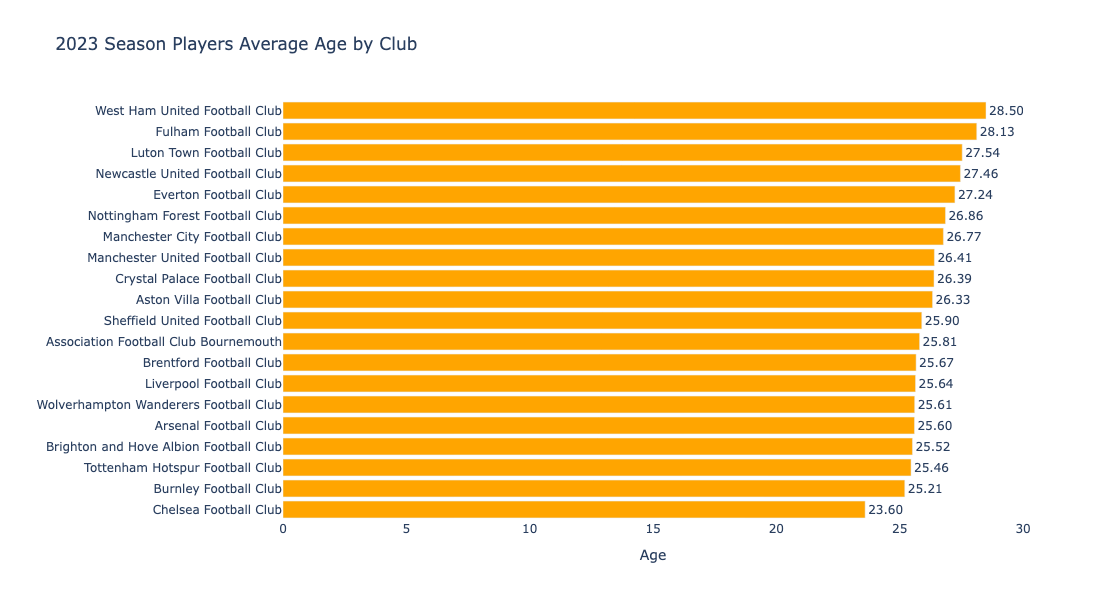

In [69]:
fig = px.bar(players_mean_age_df, x=players_mean_age_df.values, y=players_mean_age_df.index, 
             title='2023 Season Players Average Age by Club',
             color=players_mean_age_df.index,
             text=players_mean_age_df.values,
             color_discrete_sequence=['orange'])  

fig.update_traces(texttemplate='%{x:,.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Age',  
    yaxis_title='',  
    width=600,  
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [70]:
# 2023 현재 클럽이 선수에 쓰는 연봉

In [71]:
# 여기서 market_value_in_eur이 현재 구단이 선수를 영입할 때 쓴 가격인지는 정확하게 모르겠다.
# 영입 후 몸값이 올라갈 수 있나???? 물어보기

In [72]:
player_value_sum = players_2023.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False)

In [73]:
pd.DataFrame(player_value_sum)

market_value_in_eur
current_club_name                                          
Manchester City Football Club                  1.270200e+09
Arsenal Football Club                          1.118500e+09
Chelsea Football Club                          9.283000e+08
Liverpool Football Club                        9.214000e+08
Tottenham Hotspur Football Club                7.773000e+08
Manchester United Football Club                7.342500e+08
Aston Villa Football Club                      6.462000e+08
Newcastle United Football Club                 6.377000e+08
Brighton and Hove Albion Football Club         5.051000e+08
West Ham United Football Club                  4.466000e+08
Brentford Football Club                        4.260750e+08
Crystal Palace Football Club                   4.047000e+08
Nottingham Forest Football Club                3.696500e+08
Association Football Club Bournemouth          3.528000e+08
Everton Football Club                          3.454000e+08
Wolverhampton Wanderers Football Club          3.397000e+08
Fulham Football Club                           3.380000e+08
Burnley Football Club                          2.561000e+08
Sheffield United Football Club                 1.437500e+08
Luton Town Football Club                       1.251000e+08

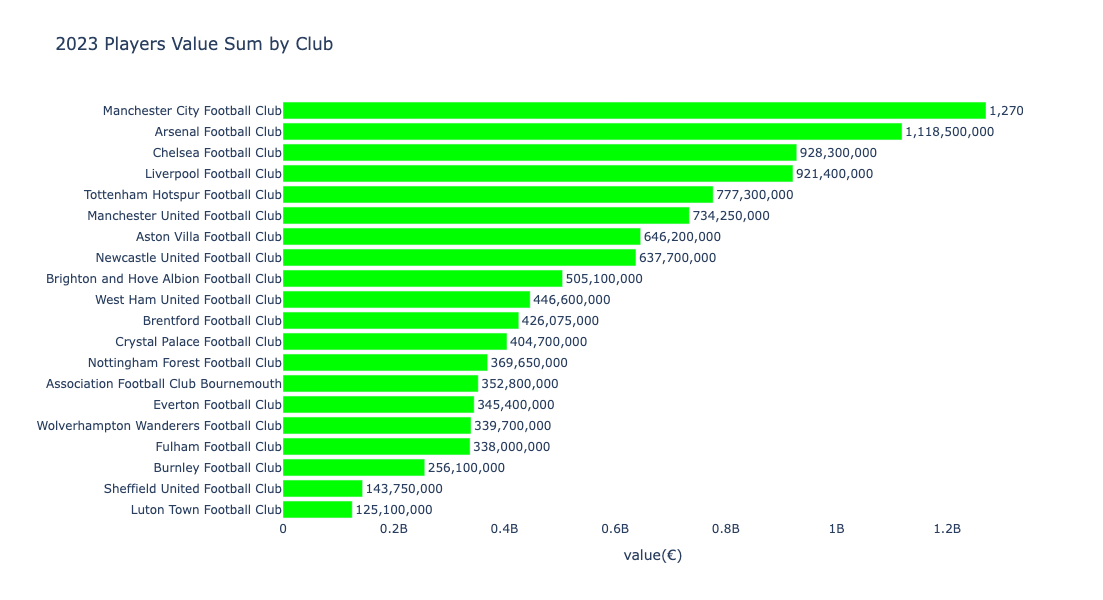

In [164]:
fig = px.bar(player_value_sum, x=player_value_sum.values, y=player_value_sum.index, 
             title='2023 Players Value Sum by Club',
             color=player_value_sum.index,
             text=player_value_sum.values,
             color_discrete_sequence=['lime'])  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='value(€)',  
    yaxis_title='',  
    width=1100,  
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [75]:
# 클럽별 선수 평균 몸값

In [76]:
player_value_avg = players_2023.groupby('current_club_name')['market_value_in_eur'].mean().sort_values(ascending=False)

In [77]:
pd.DataFrame(player_value_avg)

market_value_in_eur
current_club_name                                          
Manchester City Football Club                  5.773636e+07
Arsenal Football Club                          4.474000e+07
Liverpool Football Club                        3.290714e+07
Chelsea Football Club                          3.094333e+07
Tottenham Hotspur Football Club                2.989615e+07
Manchester United Football Club                2.719444e+07
Aston Villa Football Club                      2.393333e+07
Newcastle United Football Club                 2.277500e+07
West Ham United Football Club                  2.030000e+07
Brighton and Hove Albion Football Club         1.870741e+07
Wolverhampton Wanderers Football Club          1.476957e+07
Crystal Palace Football Club                   1.445357e+07
Brentford Football Club                        1.420250e+07
Fulham Football Club                           1.408333e+07
Everton Football Club                          1.381600e+07
Association Football Club Bournemouth          1.356923e+07
Nottingham Forest Football Club                1.320179e+07
Burnley Football Club                          8.831034e+06
Sheffield United Football Club                 4.956897e+06
Luton Town Football Club                       4.467857e+06

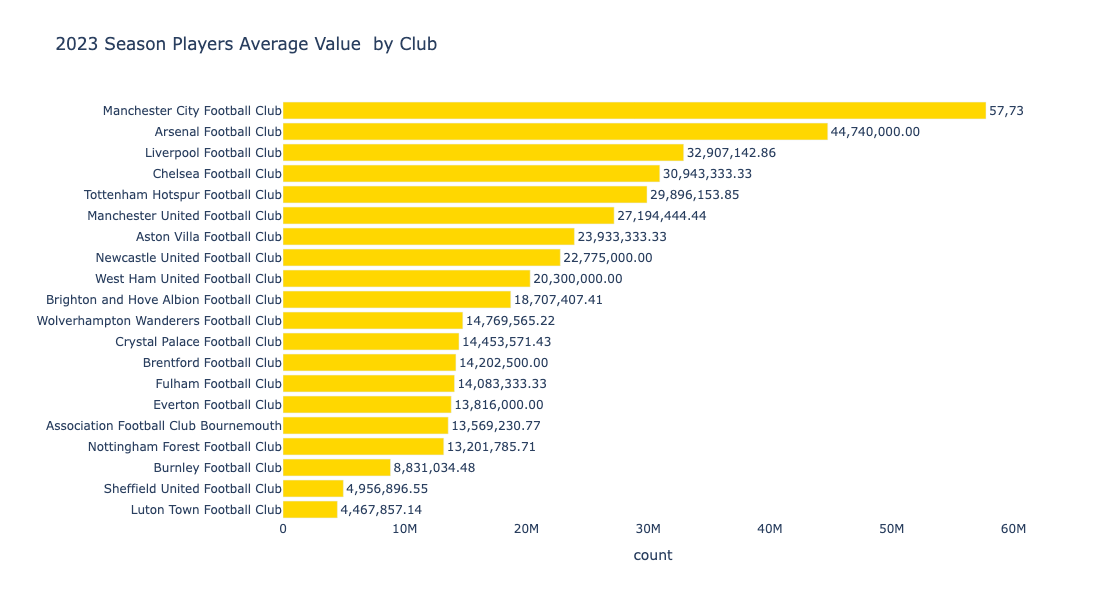

In [78]:
fig = px.bar(player_value_avg, x=player_value_avg.values, y=player_value_avg.index, 
             title='2023 Season Players Average Value  by Club',
             color=player_value_avg.index,
             text=player_value_avg.values,
             color_discrete_sequence=['gold'])  

fig.update_traces(texttemplate='%{x:,.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='count',  
    yaxis_title='',  
    width=1100,  
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [79]:
# 프리미어리그 선수들의 prefered foot

In [80]:
players_df.head()

player_id                    name  last_season  current_club_id  \
7          132           Tomas Rosicky         2015               11   
20         488         Gerhard Tremmel         2016             2288   
63        1397            Michael Owen         2012              512   
75        1573     Thomas Hitzlsperger         2012               29   
113       2514  Bastian Schweinsteiger         2016              985   

                player_code country_of_birth city_of_birth  \
7             tomas-rosicky             CSSR         Praha   
20          gerhard-tremmel          Germany       München   
63             michael-owen          England       Chester   
75      thomas-hitzlsperger          Germany       München   
113  bastian-schweinsteiger          Germany    Kolbermoor   

    country_of_citizenship date_of_birth        sub_position    position  \
7           Czech Republic    1980-10-04  Attacking Midfield    Midfield   
20                 Germany    1978-11-16          Goalkeeper  Goalkeeper   
63                 England    1979-12-14      Centre-Forward      Attack   
75                 Germany    1982-04-05    Central Midfield    Midfield   
113                Germany    1984-08-01    Central Midfield    Midfield   

     foot  height_in_cm contract_expiration_date        agent_name  \
7    both         179.0                      NaN               NaN   
20    NaN           NaN                      NaN               NaN   
63   both         173.0                      NaN               NaN   
75    NaN           NaN                      NaN               NaN   
113   NaN           NaN                      NaN  BS Family Office   

    current_club_domestic_competition_id                current_club_name  \
7                                    GB1            Arsenal Football Club   
20                                   GB1                     Swansea City   
63                                   GB1                       Stoke City   
75                                   GB1            Everton Football Club   
113                                  GB1  Manchester United Football Club   

     market_value_in_eur  highest_market_value_in_eur  
7               350000.0                   17500000.0  
20              250000.0                    2200000.0  
63             1000000.0                   30000000.0  
75             1000000.0                    9000000.0  
113            1000000.0                   40000000.0

In [81]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 7 to 30445
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             2058 non-null   int64  
 1   name                                  2058 non-null   object 
 2   last_season                           2058 non-null   int64  
 3   current_club_id                       2058 non-null   int64  
 4   player_code                           2058 non-null   object 
 5   country_of_birth                      1909 non-null   object 
 6   city_of_birth                         1953 non-null   object 
 7   country_of_citizenship                2006 non-null   object 
 8   date_of_birth                         2058 non-null   object 
 9   sub_position                          2054 non-null   object 
 10  position                              2058 non-null   object 
 11  foot                 

In [82]:
prefered_foot_df = players_df['foot'].value_counts(dropna=False)

In [83]:
pd.DataFrame(prefered_foot_df)

count
foot        
right   1378
left     485
NaN      163
both      32

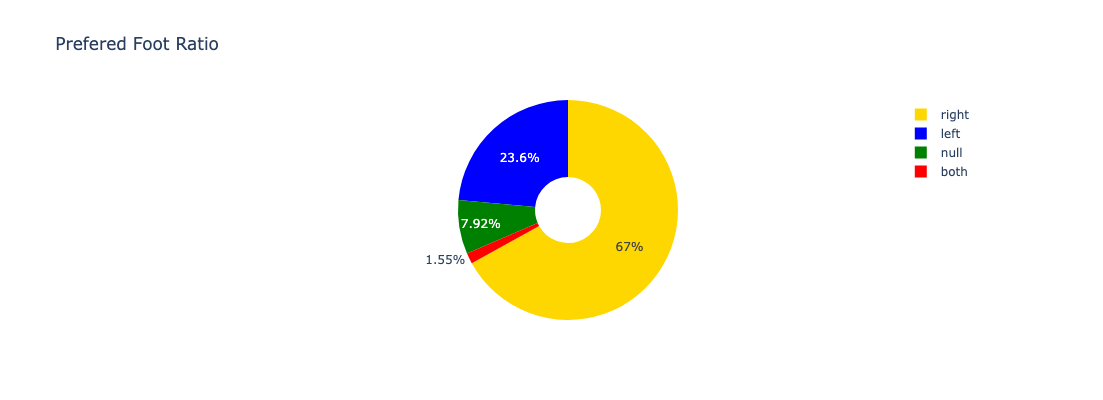

In [84]:
fig = px.pie(prefered_foot_df, values=prefered_foot_df, names=prefered_foot_df.index,
             title='Prefered Foot Ratio', color_discrete_sequence=['gold', 'blue', 'green', 'red'],  
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [85]:
# 그래서 양발 쓰는 선수가 누군데?

In [86]:
# 양발을 쓴다고 몸값이 무조건 높은 것은 아닌 것으로 보임 
# 양발쓰는 선수 중에서는 손흥민이 가장 몸값이 높음(12~23 season)

In [87]:
players_df[players_df['foot'] == 'both'].sort_values('market_value_in_eur', ascending=False)

player_id                name  last_season  current_club_id  \
7348       91845       Heung-min Son         2023              148   
25621     591949        Aaron Hickey         2023             1148   
24710     548729        Zeki Amdouni         2023             1132   
8966      125714        Mark Flekken         2023             1148   
18022     330659     Justin Kluivert         2023              989   
3578       42460        Ivan Perisic         2022              148   
7778       99331  Jannik Vestergaard         2022             1003   
271         3881        Glen Johnson         2017              512   
24662     546712        Anis Slimane         2023              350   
3574       42412         Jonny Evans         2023              985   
63          1397        Michael Owen         2012              512   
2750       33713        Theo Walcott         2022              180   
3704       43530        Adam Lallana         2023             1237   
9495      134424         Nick Powell         2015              985   
1142       14041  Mikele Leigertwood         2012             1032   
1148       14086        Ashley Young         2023               29   
4672       54576    Sebastián Blanco         2014              984   
297         4070      Liam Ridgewell         2013              984   
278         3924       Didier Drogba         2014              631   
330         4321      Steven Pienaar         2016              289   
3508       41416      James McArthur         2022              873   
9355      131171        Juan Agudelo         2013              512   
7            132       Tomas Rosicky         2015               11   
8123      107427         Ikechi Anya         2016             1010   
5877       67322  Anthony Pilkington         2013             1123   
3380       39700          Mark Gower         2012             2288   
3146       37304          Shane Long         2021              180   
8720      121327    Matthew Fletcher         2013             3008   
1541       18324         Zoltán Gera         2013              984   
3521       41665       Jonathan Parr         2013              873   
2169       25742      Nikica Jelavic         2015              379   
2543       30456         Marc Wilson         2016              984   

              player_code   country_of_birth          city_of_birth  \
7348        heung-min-son       Korea, South     Chuncheon, Gangwon   
25621        aaron-hickey           Scotland                Glasgow   
24710        zeki-amdouni        Switzerland                 Genève   
8966         mark-flekken        Netherlands               Bocholtz   
18022     justin-kluivert        Netherlands                Zaandam   
3578         ivan-perisic  Jugoslawien (SFR)                  Split   
7778   jannik-vestergaard            Denmark               Hvidovre   
271          glen-johnson            England                 London   
24662        anis-slimane            Denmark             Kopenhagen   
3574          jonny-evans   Northern Ireland                Belfast   
63           michael-owen            England                Chester   
2750         theo-walcott            England                 London   
3704         adam-lallana            England              St Albans   
9495          nick-powell            England                  Crewe   
1142   mikele-leigertwood            England                Enfield   
1148         ashley-young            England              Stevenage   
4672     sebastian-blanco          Argentina           Buenos Aires   
297        liam-ridgewell            England                 London   
278         didier-drogba      Cote d'Ivoire                Abidjan   
330        steven-pienaar       South Africa  Johannesburg, Gauteng   
3508       james-mcarthur           Scotland                Glasgow   
9355         juan-agudelo           Colombia              Manizales   
7           tomas-rosicky               CSSR                  P

In [88]:
both_foot_value_df = players_df[players_df['foot'] == 'both'].sort_values('market_value_in_eur', ascending=False)

In [89]:
pd.DataFrame(both_foot_value_df)

player_id                name  last_season  current_club_id  \
7348       91845       Heung-min Son         2023              148   
25621     591949        Aaron Hickey         2023             1148   
24710     548729        Zeki Amdouni         2023             1132   
8966      125714        Mark Flekken         2023             1148   
18022     330659     Justin Kluivert         2023              989   
3578       42460        Ivan Perisic         2022              148   
7778       99331  Jannik Vestergaard         2022             1003   
271         3881        Glen Johnson         2017              512   
24662     546712        Anis Slimane         2023              350   
3574       42412         Jonny Evans         2023              985   
63          1397        Michael Owen         2012              512   
2750       33713        Theo Walcott         2022              180   
3704       43530        Adam Lallana         2023             1237   
9495      134424         Nick Powell         2015              985   
1142       14041  Mikele Leigertwood         2012             1032   
1148       14086        Ashley Young         2023               29   
4672       54576    Sebastián Blanco         2014              984   
297         4070      Liam Ridgewell         2013              984   
278         3924       Didier Drogba         2014              631   
330         4321      Steven Pienaar         2016              289   
3508       41416      James McArthur         2022              873   
9355      131171        Juan Agudelo         2013              512   
7            132       Tomas Rosicky         2015               11   
8123      107427         Ikechi Anya         2016             1010   
5877       67322  Anthony Pilkington         2013             1123   
3380       39700          Mark Gower         2012             2288   
3146       37304          Shane Long         2021              180   
8720      121327    Matthew Fletcher         2013             3008   
1541       18324         Zoltán Gera         2013              984   
3521       41665       Jonathan Parr         2013              873   
2169       25742      Nikica Jelavic         2015              379   
2543       30456         Marc Wilson         2016              984   

              player_code   country_of_birth          city_of_birth  \
7348        heung-min-son       Korea, South     Chuncheon, Gangwon   
25621        aaron-hickey           Scotland                Glasgow   
24710        zeki-amdouni        Switzerland                 Genève   
8966         mark-flekken        Netherlands               Bocholtz   
18022     justin-kluivert        Netherlands                Zaandam   
3578         ivan-perisic  Jugoslawien (SFR)                  Split   
7778   jannik-vestergaard            Denmark               Hvidovre   
271          glen-johnson            England                 London   
24662        anis-slimane            Denmark             Kopenhagen   
3574          jonny-evans   Northern Ireland                Belfast   
63           michael-owen            England                Chester   
2750         theo-walcott            England                 London   
3704         adam-lallana            England              St Albans   
9495          nick-powell            England                  Crewe   
1142   mikele-leigertwood            England                Enfield   
1148         ashley-young            England              Stevenage   
4672     sebastian-blanco          Argentina           Buenos Aires   
297        liam-ridgewell            England                 London   
278         didier-drogba      Cote d'Ivoire                Abidjan   
330        steven-pienaar       South Africa  Johannesburg, Gauteng   
3508       james-mcarthur           Scotland                Glasgow   
9355         juan-agudelo           Colombia              Manizales   
7           tomas-rosicky               CSSR                  P

In [90]:
both_foot_value_top10 = players_df[players_df['foot'] == 'both'].sort_values('market_value_in_eur', ascending=False).head(10)

In [91]:
both_foot_value_top10

player_id                name  last_season  current_club_id  \
7348       91845       Heung-min Son         2023              148   
25621     591949        Aaron Hickey         2023             1148   
24710     548729        Zeki Amdouni         2023             1132   
8966      125714        Mark Flekken         2023             1148   
18022     330659     Justin Kluivert         2023              989   
3578       42460        Ivan Perisic         2022              148   
7778       99331  Jannik Vestergaard         2022             1003   
271         3881        Glen Johnson         2017              512   
24662     546712        Anis Slimane         2023              350   
3574       42412         Jonny Evans         2023              985   

              player_code   country_of_birth       city_of_birth  \
7348        heung-min-son       Korea, South  Chuncheon, Gangwon   
25621        aaron-hickey           Scotland             Glasgow   
24710        zeki-amdouni        Switzerland              Genève   
8966         mark-flekken        Netherlands            Bocholtz   
18022     justin-kluivert        Netherlands             Zaandam   
3578         ivan-perisic  Jugoslawien (SFR)               Split   
7778   jannik-vestergaard            Denmark            Hvidovre   
271          glen-johnson            England              London   
24662        anis-slimane            Denmark          Kopenhagen   
3574          jonny-evans   Northern Ireland             Belfast   

      country_of_citizenship date_of_birth      sub_position    position  \
7348            Korea, South    1992-07-08       Left Winger      Attack   
25621               Scotland    2002-06-10        Right-Back    Defender   
24710            Switzerland    2000-12-04    Centre-Forward      Attack   
8966             Netherlands    1993-06-13        Goalkeeper  Goalkeeper   
18022            Netherlands    1999-05-05       Left Winger      Attack   
3578                 Croatia    1989-02-02     Left Midfield    Midfield   
7778                 Denmark    1992-08-03       Centre-Back    Defender   
271                  England    1984-08-23        Right-Back    Defender   
24662                Tunisia    2001-03-16  Central Midfield    Midfield   
3574        Northern Ireland    1988-01-03       Centre-Back    Defender   

       foot  height_in_cm contract_expiration_date           agent_name  \
7348   both         184.0      2025-06-30 00:00:00         CAA Base Ltd   
25621  both         185.0      2026-06-30 00:00:00                  PLG   
24710  both         185.0      2028-06-30 00:00:00                  NaN   
8966   both         195.0      2027-06-30 00:00:00                  SEG   
18022  both         172.0      2028-06-30 00:00:00          Team Raiola   
3578   both         186.0      2024-06-30 00:00:00                  NaN   
7778   both         199.0      2024-06-30 00:00:00  Unique Sports Group   
271    both         182.0                      NaN          CAA Stellar   
24662  both         188.0      2026-06-30 00:00:00        LEAD Football   
3574   both         188.0      2024-06-30 00:00:00                  NaN   

      current_club_domestic_competition_id  \
7348                                   GB1   
25621                                  GB1   
24710                                  GB1   
8966                                   GB1   
18022                                  GB1   
3578                                   GB1   
7778                                   GB1   
271                                    GB1   
24662                                  GB1   
3574                                   GB1   

                           current_club_name  market_value_in_eur  \
7348         Tottenham Hotspur Football Club           50000000.0   
25621                Brentford Football Club           30000000.0   
24710                  Burnley Football Club           15000000.0   
8966                 Brentford Football C

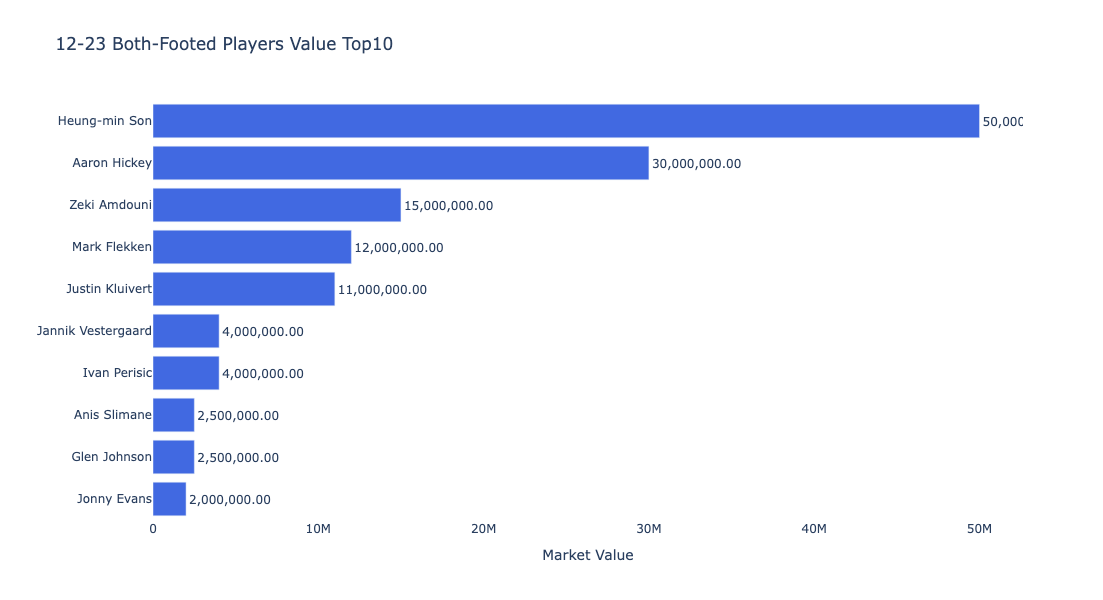

In [92]:
both_foot_value_top10_sorted = both_foot_value_top10.sort_values(by='market_value_in_eur', ascending=True)

fig = px.bar(both_foot_value_top10_sorted, x='market_value_in_eur', y='name', 
             title='12-23 Both-Footed Players Value Top10',
             text=both_foot_value_top10_sorted['market_value_in_eur'],
             color_discrete_sequence=['royalblue'])  

fig.update_traces(texttemplate='%{x:,.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Market Value',  
    yaxis_title='',  
    width=1100,  
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show() 

In [93]:
players_df.head()

player_id                    name  last_season  current_club_id  \
7          132           Tomas Rosicky         2015               11   
20         488         Gerhard Tremmel         2016             2288   
63        1397            Michael Owen         2012              512   
75        1573     Thomas Hitzlsperger         2012               29   
113       2514  Bastian Schweinsteiger         2016              985   

                player_code country_of_birth city_of_birth  \
7             tomas-rosicky             CSSR         Praha   
20          gerhard-tremmel          Germany       München   
63             michael-owen          England       Chester   
75      thomas-hitzlsperger          Germany       München   
113  bastian-schweinsteiger          Germany    Kolbermoor   

    country_of_citizenship date_of_birth        sub_position    position  \
7           Czech Republic    1980-10-04  Attacking Midfield    Midfield   
20                 Germany    1978-11-16          Goalkeeper  Goalkeeper   
63                 England    1979-12-14      Centre-Forward      Attack   
75                 Germany    1982-04-05    Central Midfield    Midfield   
113                Germany    1984-08-01    Central Midfield    Midfield   

     foot  height_in_cm contract_expiration_date        agent_name  \
7    both         179.0                      NaN               NaN   
20    NaN           NaN                      NaN               NaN   
63   both         173.0                      NaN               NaN   
75    NaN           NaN                      NaN               NaN   
113   NaN           NaN                      NaN  BS Family Office   

    current_club_domestic_competition_id                current_club_name  \
7                                    GB1            Arsenal Football Club   
20                                   GB1                     Swansea City   
63                                   GB1                       Stoke City   
75                                   GB1            Everton Football Club   
113                                  GB1  Manchester United Football Club   

     market_value_in_eur  highest_market_value_in_eur  
7               350000.0                   17500000.0  
20              250000.0                    2200000.0  
63             1000000.0                   30000000.0  
75             1000000.0                    9000000.0  
113            1000000.0                   40000000.0

In [94]:
# 가장 많은 골을 넣은 선수

In [95]:
appearances_df = pd.read_csv('./data/appearances.csv')

In [96]:
appearances_df.head()

appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0   2231978_38004  2231978      38004             853                     235   
1   2233748_79232  2233748      79232            8841                    2698   
2   2234413_42792  2234413      42792            6251                     465   
3   2234418_73333  2234418      73333            1274                    6646   
4  2234421_122011  2234421     122011             195                    3008   

         date       player_name competition_id  yellow_cards  red_cards  \
0  2012-07-03  Aurélien Joachim            CLQ             0          0   
1  2012-07-05    Ruslan Abyshov            ELQ             0          0   
2  2012-07-05       Sander Puri            ELQ             0          0   
3  2012-07-05   Vegar Hedenstad            ELQ             0          0   
4  2012-07-05  Markus Henriksen            ELQ             0          0   

   goals  assists  minutes_played  
0      2        0              90  
1      0        0              90  
2      0        0              45  
3      0        0              90  
4      0        1              90

In [97]:
appearances_df = appearances_df[appearances_df['game_id'].isin(games_df['game_id'])]

In [98]:
appearances_df.head()

appearance_id  game_id  player_id  player_club_id  \
785591   3050172_10003  3050172      10003            1003   
785592  3050172_118287  3050172     118287            1003   
785593  3050172_122153  3050172     122153             985   
785594   3050172_16911  3050172      16911            1003   
785595  3050172_177907  3050172     177907            1003   

        player_current_club_id        date        player_name competition_id  \
785591                    1003  2018-08-10         Wes Morgan            GB1   
785592                     114  2018-08-10     Rachid Ghezzal            GB1   
785593                     506  2018-08-10         Paul Pogba            GB1   
785594                      58  2018-08-10  Kasper Schmeichel            GB1   
785595                     985  2018-08-10      Harry Maguire            GB1   

        yellow_cards  red_cards  goals  assists  minutes_played  
785591             0          0      0        0              90  
785592             0          0      0        0              27  
785593             0          0      1        0              84  
785594             0          0      0        0              90  
785595             0          0      0        0              90

In [99]:
appearances_df.groupby(['player_id', 'player_name'])['goals'].sum().sort_values(ascending=False)

player_id  player_name        
148455     Mohamed Salah          120
132098     Harry Kane             105
91845      Heung-min Son           87
197838     Jamie Vardy             74
134425     Raheem Sterling         72
                                 ... 
238223     Ederson                  0
238407     Alexander Sørloth        0
238809     Florent Hadergjonaj      0
239949     Jamal Lowe               0
1082850    Deivid Washington        0
Name: goals, Length: 1261, dtype: int64

In [100]:
# 2018~2023년도 카운팅 
appearances_df.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(20)

player_name
Mohamed Salah                120
Harry Kane                   105
Heung-min Son                 87
Jamie Vardy                   74
Raheem Sterling               72
Callum Wilson                 67
Sadio Mané                    67
Marcus Rashford               66
Pierre-Emerick Aubameyang     59
Danny Ings                    57
Diogo Jota                    56
Ollie Watkins                 56
Erling Haaland                54
Richarlison                   54
Gabriel Jesus                 53
Chris Wood                    53
Bruno Fernandes               48
James Maddison                47
Phil Foden                    46
Roberto Firmino               46
Name: goals, dtype: int64

In [101]:
# 시즌별로 골을 많이 넣은 선수 top5 알아보기

In [102]:
appearances_df = pd.merge(games_df[['game_id', 'season']], appearances_df, on='game_id')

In [103]:
appearances_df

game_id  season   appearance_id  player_id  player_club_id  \
0      3050170    2018  3050170_102017     102017             631   
1      3050170    2018  3050170_112515     112515             631   
2      3050170    2018  3050170_123951     123951            1110   
3      3050170    2018  3050170_128223     128223             631   
4      3050170    2018  3050170_131978     131978             631   
...        ...     ...             ...        ...             ...   
61398  3592240    2021  3592240_476344     476344             148   
61399  3592240    2021  3592240_584769     584769            1132   
61400  3592240    2021   3592240_63200      63200            1132   
61401  3592240    2021   3592240_77100      77100             148   
61402  3592240    2021   3592240_91845      91845             148   

       player_current_club_id        date    player_name competition_id  \
0                          11  2018-08-11       Jorginho            GB1   
1                         131  2018-08-11  Marcos Alonso            GB1   
2                         371  2018-08-11     Aaron Mooy            GB1   
3                          13  2018-08-11  Álvaro Morata            GB1   
4                        1031  2018-08-11   Ross Barkley            GB1   
...                       ...         ...            ...            ...   
61398                     148  2022-05-15  Emerson Royal            GB1   
61399                      29  2022-05-15  Dwight McNeil            GB1   
61400                    1132  2022-05-15  Ashley Barnes            GB1   
61401                     148  2022-05-15    Lucas Moura            GB1   
61402                     148  2022-05-15  Heung-min Son            GB1   

       yellow_cards  red_cards  goals  assists  minutes_played  
0                 0          0      1        0              90  
1                 0          0      0        1              90  
2                 0          0      0        0              90  
3                 0          0      0        0              90  
4                 0          0      0        0              68  
...             ...        ...    ...      ...             ...  
61398             0          0      0        0              90  
61399             0          0      0        0              90  
61400             0          0      0        0              78  
61401             1          0      0        0              79  
61402             0          0      0        0              90  

[61403 rows x 14 columns]

In [104]:
goals_by_season_player = appearances_df.groupby(['season', 'player_name'])['goals'].sum()

In [105]:
top5_goals_by_season_player = goals_by_season_player.groupby('season', group_keys=False).apply(lambda x: x.nlargest(5))

In [106]:
top5_goals_by_season_player_df = pd.DataFrame(top5_goals_by_season_player)

In [107]:
top5_goals_by_season_player_df

goals
season player_name                     
2018   Mohamed Salah                 22
       Pierre-Emerick Aubameyang     22
       Sadio Mané                    22
       Sergio Agüero                 21
       Jamie Vardy                   18
2019   Jamie Vardy                   23
       Danny Ings                    22
       Pierre-Emerick Aubameyang     22
       Raheem Sterling               20
       Mohamed Salah                 19
2020   Harry Kane                    23
       Mohamed Salah                 22
       Bruno Fernandes               18
       Heung-min Son                 17
       Patrick Bamford               17
2021   Heung-min Son                 23
       Mohamed Salah                 23
       Cristiano Ronaldo             18
       Harry Kane                    17
       Sadio Mané                    16
2022   Erling Haaland                36
       Harry Kane                    30
       Ivan Toney                    20
       Mohamed Salah                 19
       Callum Wilson                 18
2023   Erling Haaland                18
       Ollie Watkins                 16
       Dominic Solanke               15
       Mohamed Salah                 15
       Heung-min Son                 14

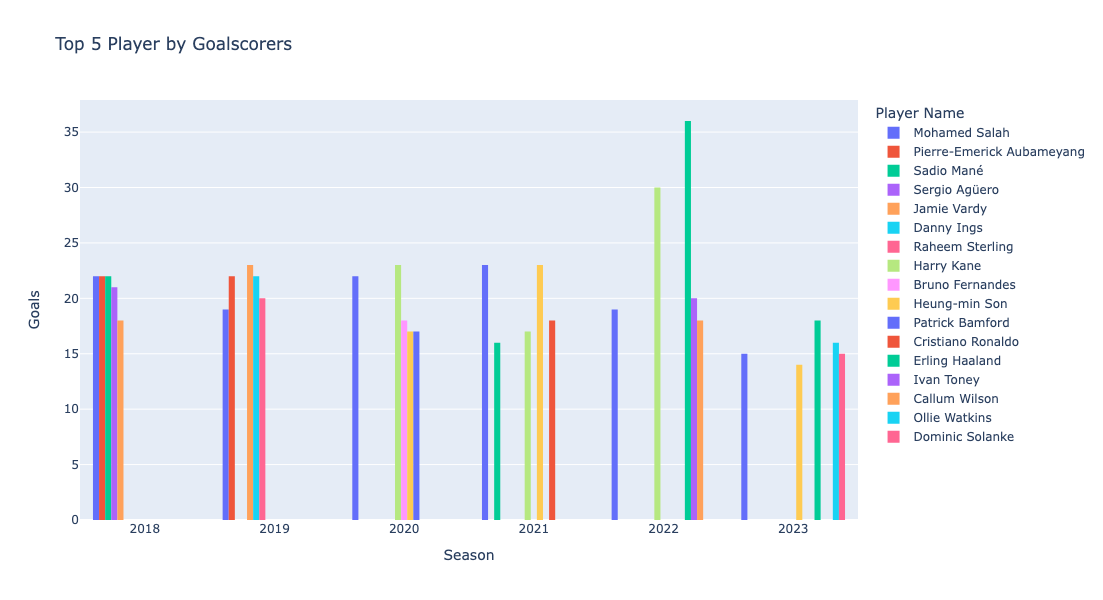

In [161]:
df_for_plotting = top5_goals_by_season_player.reset_index()

fig = px.bar(df_for_plotting, x='season', y='goals', color='player_name', barmode='group',
             title='Top 5 Player by Goalscorers',
             labels={'goals': 'Goals', 'player_name': 'Player Name', 'season': 'Season'})

fig.update_layout(width=1100, height=600)  
fig.update_traces(marker=dict(line=dict(width=0.01)))

fig.show()


In [109]:
# 2023 가장 많이 뛴 선수(play time이 가장 긴 선수)

In [110]:
appearances_df.head()

game_id  season   appearance_id  player_id  player_club_id  \
0  3050170    2018  3050170_102017     102017             631   
1  3050170    2018  3050170_112515     112515             631   
2  3050170    2018  3050170_123951     123951            1110   
3  3050170    2018  3050170_128223     128223             631   
4  3050170    2018  3050170_131978     131978             631   

   player_current_club_id        date    player_name competition_id  \
0                      11  2018-08-11       Jorginho            GB1   
1                     131  2018-08-11  Marcos Alonso            GB1   
2                     371  2018-08-11     Aaron Mooy            GB1   
3                      13  2018-08-11  Álvaro Morata            GB1   
4                    1031  2018-08-11   Ross Barkley            GB1   

   yellow_cards  red_cards  goals  assists  minutes_played  
0             0          0      1        0              90  
1             0          0      0        1              90  
2             0          0      0        0              90  
3             0          0      0        0              90  
4             0          0      0        0              68

In [111]:
appearances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 61403 non-null  int64 
 1   season                  61403 non-null  int64 
 2   appearance_id           61403 non-null  object
 3   player_id               61403 non-null  int64 
 4   player_club_id          61403 non-null  int64 
 5   player_current_club_id  61403 non-null  int64 
 6   date                    61403 non-null  object
 7   player_name             61403 non-null  object
 8   competition_id          61403 non-null  object
 9   yellow_cards            61403 non-null  int64 
 10  red_cards               61403 non-null  int64 
 11  goals                   61403 non-null  int64 
 12  assists                 61403 non-null  int64 
 13  minutes_played          61403 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 6.6+ MB


In [112]:
appearances_2023 = appearances_df.groupby('season').get_group(2023)

In [113]:
appearances_2023_df = appearances_2023.groupby('player_name')['minutes_played'].sum().sort_values(ascending=False)

In [114]:
appearances_2023_df =pd.DataFrame(appearances_2023_df)

In [115]:
appearances_2023_df.head(50)

minutes_played
player_name                       
Thomas Kaminski               2610
Bernd Leno                    2610
Ollie Watkins                 2573
Emiliano Martínez             2520
Joachim Andersen              2520
Guglielmo Vicario             2520
James Trafford                2520
André Onana                   2520
William Saliba                2520
James Tarkowski               2520
Ilya Zabarnyi                 2520
Jordan Pickford               2520
Max Kilman                    2520
Jarrod Bowen                  2518
Dominic Solanke               2500
Mark Flekken                  2475
Antonee Robinson              2472
Fabian Schär                  2444
Bruno Fernandes               2430
Douglas Luiz                  2423
Declan Rice                   2398
Vladimir Coufal               2395
Morgan Gibbs-White            2387
John McGinn                   2383
Bruno Guimarães               2369
Emerson Palmieri              2358
Nélson Semedo                 2353
Tyrick Mitchell               2349
James Ward-Prowse             2341
Neto                          2340
Vitaly Janelt                 2333
Jack Robinson                 2323
Phil Foden                    2316
Ederson                       2314
James Garner                  2313
Alphonse Areola               2295
Virgil van Dijk               2278
Diogo Dalot                   2274
Bukayo Saka                   2274
Ezri Konsa                    2264
Kyle Walker                   2261
Jarrad Branthwaite            2250
Pedro Porro                   2248
Tomas Soucek                  2239
José Sá                       2228
Axel Disasi                   2227
Martin Ødegaard               2217
Pascal Groß                   2214
Dejan Kulusevski              2214
Craig Dawson                  2211

In [116]:
appearances_2023_top15_df = appearances_2023_df.head(15)

In [117]:
appearances_2023_top15_df

minutes_played
player_name                      
Thomas Kaminski              2610
Bernd Leno                   2610
Ollie Watkins                2573
Emiliano Martínez            2520
Joachim Andersen             2520
Guglielmo Vicario            2520
James Trafford               2520
André Onana                  2520
William Saliba               2520
James Tarkowski              2520
Ilya Zabarnyi                2520
Jordan Pickford              2520
Max Kilman                   2520
Jarrod Bowen                 2518
Dominic Solanke              2500

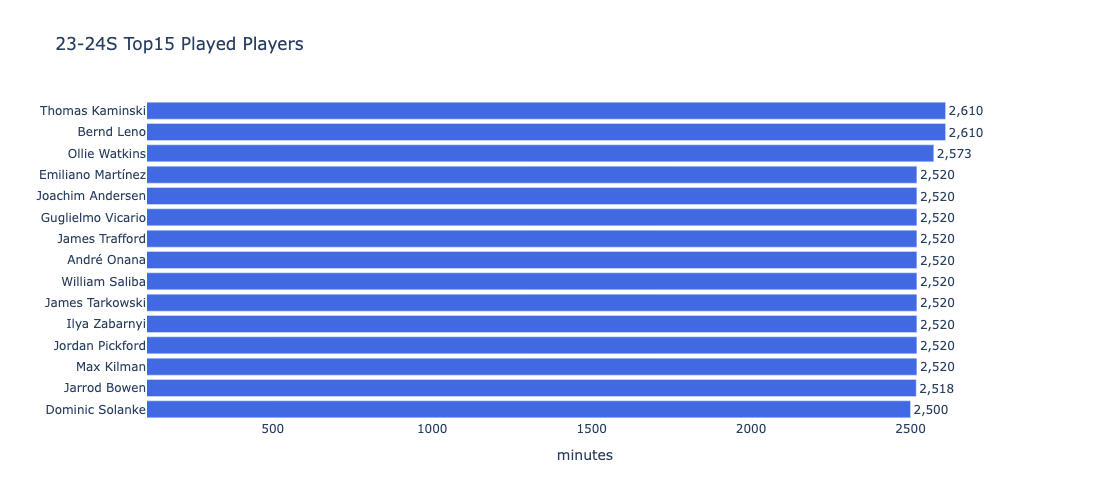

In [162]:
fig = px.bar(appearances_2023_top15_df, x='minutes_played', y=appearances_2023_top15_df.index, 
             title='23-24S Top15 Played Players',
             color=appearances_2023_top15_df.index,
             color_discrete_sequence=['royalblue'],
             text='minutes_played')  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='minutes',  
    yaxis_title='',  
    width=800,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()


In [119]:
# 2023 옐로카드 가장 많이 받은 선수

In [120]:
appearances_2023.head()

game_id  season   appearance_id  player_id  player_club_id  \
2954  4087962    2023  4087962_123275     123275             931   
2955  4087962    2023  4087962_145466     145466             931   
2956  4087962    2023  4087962_177476     177476             281   
2957  4087962    2023  4087962_186186     186186             931   
2958  4087962    2023  4087962_203394     203394             931   

      player_current_club_id        date            player_name  \
2954                     931  2023-09-02            Tom Cairney   
2955                     931  2023-09-02               Tim Ream   
2956                     281  2023-09-02             Nathan Aké   
2957                     931  2023-09-02  Bobby De Cordova-Reid   
2958                     931  2023-09-02        Andreas Pereira   

     competition_id  yellow_cards  red_cards  goals  assists  minutes_played  
2954            GB1             0          0      0        0              16  
2955            GB1             0          0      1        0              90  
2956            GB1             0          0      1        0              90  
2957            GB1             1          0      0        0              73  
2958            GB1             1          0      0        0              90

In [121]:
yellow_taker_2023 = appearances_2023.groupby('player_name')['yellow_cards'].sum().sort_values(ascending=False)

In [122]:
yellow_taker_2023 = pd.DataFrame(yellow_taker_2023)

In [123]:
top6_yellow_taker_2023 = yellow_taker_2023.head(6)

In [124]:
top6_yellow_taker_2023

yellow_cards
player_name                  
João Palhinha              12
Edson Álvarez              10
Mario Lemina               10
Moisés Caicedo              9
Nicolas Jackson             9
Bruno Guimarães             9

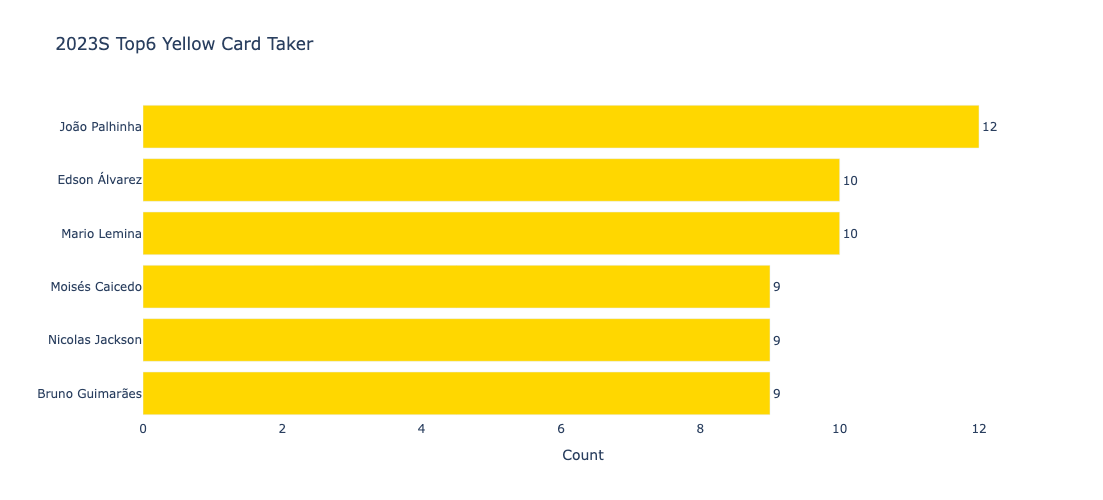

In [125]:
fig = px.bar(top6_yellow_taker_2023, x='yellow_cards', y=top6_yellow_taker_2023.index, 
             title='2023S Top6 Yellow Card Taker',
             color=top6_yellow_taker_2023.index,
             color_discrete_sequence=['gold'],
             text='yellow_cards')  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Count',  
    yaxis_title='',  
    width=800,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [126]:
# 2023 선수 몸값 순위

In [127]:
top10_player_value_2023 = players_2023.sort_values('market_value_in_eur', ascending=False)[['name', 'market_value_in_eur']].head(10)

In [128]:
top10_player_value_2023 = top10_player_value_2023.sort_values('market_value_in_eur', ascending=True)

In [129]:
top10_player_value_2023

name  market_value_in_eur
23413   William Saliba           80000000.0
14410   Bernardo Silva           80000000.0
23940  Bruno Guimarães           85000000.0
25297   Julián Álvarez           90000000.0
17558  Martin Ødegaard           95000000.0
19411            Rodri          110000000.0
19416      Declan Rice          110000000.0
21897      Bukayo Saka          130000000.0
21166       Phil Foden          130000000.0
21478   Erling Haaland          180000000.0

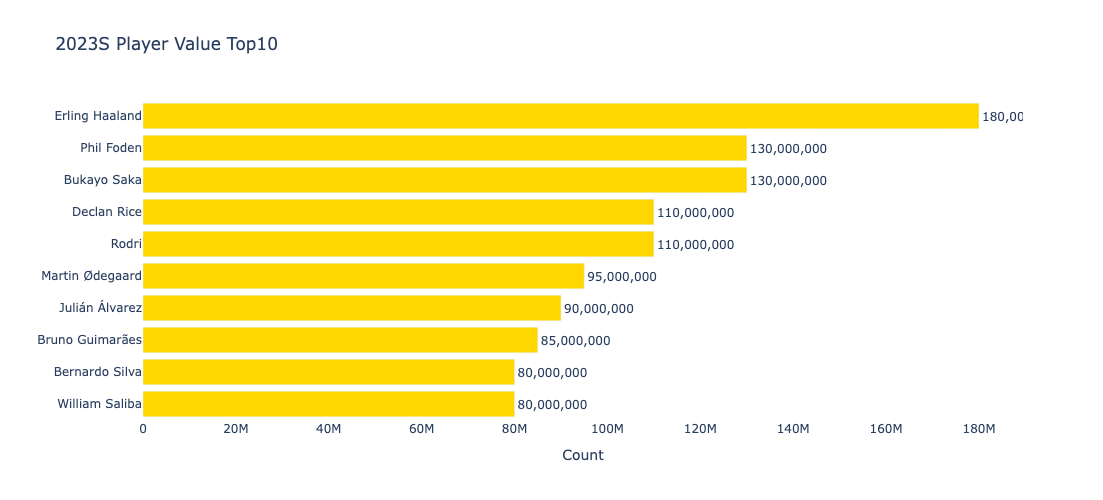

In [130]:
fig = px.bar(top10_player_value_2023, x='market_value_in_eur', y='name', 
             title='2023S Player Value Top10',
             color_discrete_sequence=['gold'],
             text='market_value_in_eur')  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Count',  
    yaxis_title='',  
    width=800,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [131]:
# 2023 시즌 선수들 평균 나이 -> 좀 의미 없어보이네

In [132]:
players_2023

player_id                name  last_season  current_club_id  \
188         3333        James Milner         2023             1237   
1143       14044       Andy Lonergan         2023               29   
1148       14086        Ashley Young         2023               29   
1193       14555        Scott Carson         2023              281   
1385       16306            Casemiro         2023              985   
...          ...                 ...          ...              ...   
30100     983989  Facundo Buonanotte         2023             1237   
30174    1005649             Murillo         2023              703   
30315    1060740       Enso González         2023              543   
30371    1082850   Deivid Washington         2023              631   
30445    1141628    Yunus Emre Konak         2023             1148   

              player_code country_of_birth        city_of_birth  \
188          james-milner          England                Leeds   
1143        andy-lonergan          England              Preston   
1148         ashley-young          England            Stevenage   
1193         scott-carson          England           Whitehaven   
1385             casemiro           Brazil  São José dos Campos   
...                   ...              ...                  ...   
30100  facundo-buonanotte        Argentina                Pérez   
30174             murillo           Brazil            São Paulo   
30315       enso-gonzalez         Paraguay             Asunción   
30371   deivid-washington           Brazil            Itumbiara   
30445    yunus-emre-konak          Türkiye               Batman   

      country_of_citizenship date_of_birth        sub_position    position  \
188                  England    1986-01-04    Central Midfield    Midfield   
1143                 England    1983-10-19          Goalkeeper  Goalkeeper   
1148                 England    1985-07-09           Left-Back    Defender   
1193                 England    1985-09-03          Goalkeeper  Goalkeeper   
1385                  Brazil    1992-02-23  Defensive Midfield    Midfield   
...                      ...           ...                 ...         ...   
30100              Argentina    2004-12-23  Attacking Midfield    Midfield   
30174                 Brazil    2002-07-04         Centre-Back    Defender   
30315               Paraguay    2005-01-20         Left Winger      Attack   
30371                 Brazil    2005-06-05      Centre-Forward      Attack   
30445                Türkiye    2006-01-10  Defensive Midfield    Midfield   

        foot  height_in_cm contract_expiration_date         agent_name  \
188    right         175.0      2024-06-30 00:00:00                NaN   
1143    left         193.0      2024-06-30 00:00:00                NaN   
1148    both         175.0      2024-06-30 00:00:00       CAA Base Ltd   
1193   right         188.0      2024-06-30 00:00:00          Wasserman   
1385   right         185.0      2026-06-30 00:00:00        Best of You   
...      ...           ...                      ...                ...   
30100   left         174.0      2027-06-30 00:00:00                NaN   
30174   left         184.0      2028-06-30 00:00:00                NaN   
30315   left         169.0      2029-06-30 00:00:00                NaN   
30371  right         187.0      2030-06-30 00:00:00  Bertolucci Sports   
30445  right         181.0      2029-06-30 00:00:00         FutureBall   

      current_club_domestic_competition_id  \
188                                    GB1   
1143                                   GB1   
1148                                   GB1   
1193                                   GB1   
1385                                   GB1   
...                                    ...   
30100                                  GB1   
30174                                  GB1   
30315                                  GB1   
30371                                  GB1   
30445                        

In [133]:
players_2023['2024_age'].mean()

26.23308270676692

In [134]:
# 어이스트 많이 한 선수

In [135]:
appearances_df

game_id  season   appearance_id  player_id  player_club_id  \
0      3050170    2018  3050170_102017     102017             631   
1      3050170    2018  3050170_112515     112515             631   
2      3050170    2018  3050170_123951     123951            1110   
3      3050170    2018  3050170_128223     128223             631   
4      3050170    2018  3050170_131978     131978             631   
...        ...     ...             ...        ...             ...   
61398  3592240    2021  3592240_476344     476344             148   
61399  3592240    2021  3592240_584769     584769            1132   
61400  3592240    2021   3592240_63200      63200            1132   
61401  3592240    2021   3592240_77100      77100             148   
61402  3592240    2021   3592240_91845      91845             148   

       player_current_club_id        date    player_name competition_id  \
0                          11  2018-08-11       Jorginho            GB1   
1                         131  2018-08-11  Marcos Alonso            GB1   
2                         371  2018-08-11     Aaron Mooy            GB1   
3                          13  2018-08-11  Álvaro Morata            GB1   
4                        1031  2018-08-11   Ross Barkley            GB1   
...                       ...         ...            ...            ...   
61398                     148  2022-05-15  Emerson Royal            GB1   
61399                      29  2022-05-15  Dwight McNeil            GB1   
61400                    1132  2022-05-15  Ashley Barnes            GB1   
61401                     148  2022-05-15    Lucas Moura            GB1   
61402                     148  2022-05-15  Heung-min Son            GB1   

       yellow_cards  red_cards  goals  assists  minutes_played  
0                 0          0      1        0              90  
1                 0          0      0        1              90  
2                 0          0      0        0              90  
3                 0          0      0        0              90  
4                 0          0      0        0              68  
...             ...        ...    ...      ...             ...  
61398             0          0      0        0              90  
61399             0          0      0        0              90  
61400             0          0      0        0              78  
61401             1          0      0        0              79  
61402             0          0      0        0              90  

[61403 rows x 14 columns]

In [136]:
top5_assists_players = appearances_df.groupby(['season', 'player_name'])['assists'].sum()

In [137]:
top5_assists_players_df = top5_assists_players.groupby('season', group_keys=False).apply(lambda x: x.nlargest(5))

In [138]:
top5_assists_players_df = pd.DataFrame(top5_assists_players_df)

In [139]:
top5_assists_players_df

assists
season player_name                    
2018   Eden Hazard                  15
       Ryan Fraser                  14
       Christian Eriksen            12
       Trent Alexander-Arnold       12
       Andrew Robertson             11
2019   Kevin De Bruyne              20
       Trent Alexander-Arnold       13
       Andrew Robertson             12
       Riyad Mahrez                 12
       Heung-min Son                11
2020   Harry Kane                   14
       Jack Grealish                12
       Kevin De Bruyne              12
       Timo Werner                  12
       Bruno Fernandes              11
2021   Mohamed Salah                14
       Jarrod Bowen                 12
       Trent Alexander-Arnold       12
       Andrew Robertson             10
       Harvey Barnes                10
2022   Kevin De Bruyne              18
       Leandro Trossard             13
       Mohamed Salah                12
       Bukayo Saka                  11
       Michael Olise                11
2023   Kieran Trippier              10
       Ollie Watkins                10
       Pascal Groß                  10
       Julián Álvarez                9
       Mohamed Salah                 9

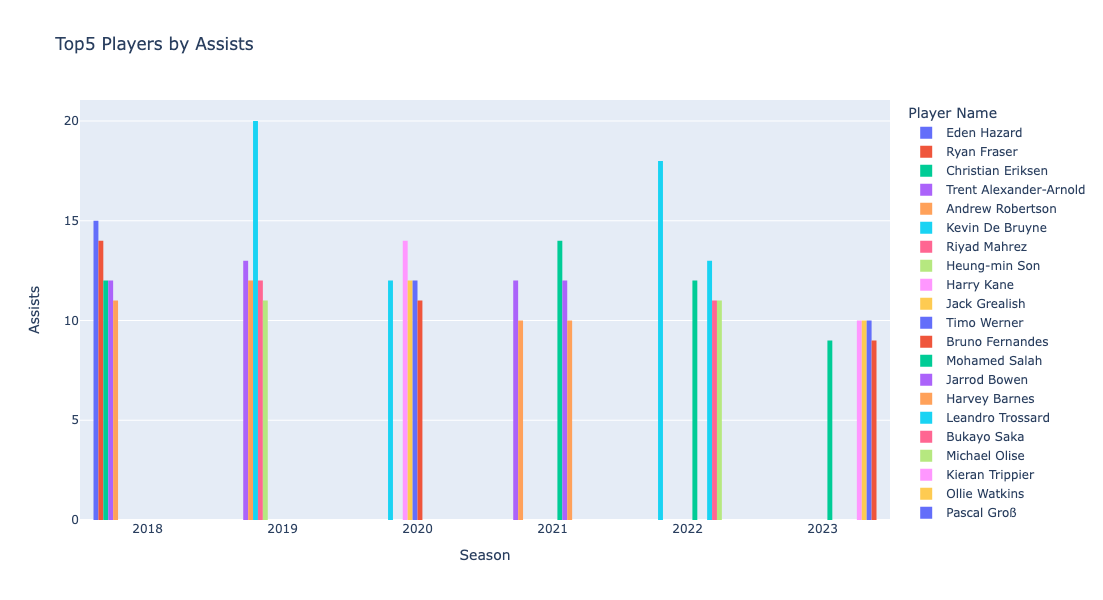

In [140]:
df_for_plotting = top5_assists_players_df.reset_index()

fig = px.bar(df_for_plotting, x='season', y='assists', color='player_name', barmode='group',
             title='Top5 Players by Assists',
             labels={'assists': 'Assists', 'player_name': 'Player Name', 'season': 'Season'})

fig.update_layout(width=1100, height=600)  
fig.update_traces(marker=dict(line=dict(width=0.01)))

fig.show()

In [141]:
# 포지션별 몸값

In [142]:
players_df

player_id                    name  last_season  current_club_id  \
7            132           Tomas Rosicky         2015               11   
20           488         Gerhard Tremmel         2016             2288   
63          1397            Michael Owen         2012              512   
75          1573     Thomas Hitzlsperger         2012               29   
113         2514  Bastian Schweinsteiger         2016              985   
...          ...                     ...          ...              ...   
30174    1005649                 Murillo         2023              703   
30232    1031256        Callum McFarlane         2022              931   
30315    1060740           Enso González         2023              543   
30371    1082850       Deivid Washington         2023              631   
30445    1141628        Yunus Emre Konak         2023             1148   

                  player_code country_of_birth city_of_birth  \
7               tomas-rosicky             CSSR         Praha   
20            gerhard-tremmel          Germany       München   
63               michael-owen          England       Chester   
75        thomas-hitzlsperger          Germany       München   
113    bastian-schweinsteiger          Germany    Kolbermoor   
...                       ...              ...           ...   
30174                 murillo           Brazil     São Paulo   
30232        callum-mcfarlane              NaN           NaN   
30315           enso-gonzalez         Paraguay      Asunción   
30371       deivid-washington           Brazil     Itumbiara   
30445        yunus-emre-konak          Türkiye        Batman   

      country_of_citizenship date_of_birth        sub_position    position  \
7             Czech Republic    1980-10-04  Attacking Midfield    Midfield   
20                   Germany    1978-11-16          Goalkeeper  Goalkeeper   
63                   England    1979-12-14      Centre-Forward      Attack   
75                   Germany    1982-04-05    Central Midfield    Midfield   
113                  Germany    1984-08-01    Central Midfield    Midfield   
...                      ...           ...                 ...         ...   
30174                 Brazil    2002-07-04         Centre-Back    Defender   
30232                England    2003-09-08      Centre-Forward      Attack   
30315               Paraguay    2005-01-20         Left Winger      Attack   
30371                 Brazil    2005-06-05      Centre-Forward      Attack   
30445                Türkiye    2006-01-10  Defensive Midfield    Midfield   

        foot  height_in_cm contract_expiration_date         agent_name  \
7       both         179.0                      NaN                NaN   
20       NaN           NaN                      NaN                NaN   
63      both         173.0                      NaN                NaN   
75       NaN           NaN                      NaN                NaN   
113      NaN           NaN                      NaN   BS Family Office   
...      ...           ...                      ...                ...   
30174   left         184.0      2028-06-30 00:00:00                NaN   
30232    NaN         185.0                      NaN       Midas Sports   
30315   left         169.0      2029-06-30 00:00:00                NaN   
30371  right         187.0      2030-06-30 00:00:00  Bertolucci Sports   
30445  right         181.0      2029-06-30 00:00:00         FutureBall   

      current_club_domestic_competition_id  \
7                                      GB1   
20                                     GB1   
63                                     GB1   
75                                     GB1   
113                                    GB1   
...                                    ...   
30174                                  GB1   
30232                                  GB1   
30315                                  GB1   
30371                                  GB1   
30445            

In [143]:
value_by_position = players_df.groupby('position')['market_value_in_eur'].mean()

In [144]:
value_by_position = pd.DataFrame(value_by_position)

In [145]:
value_by_position = value_by_position.iloc[:4]

In [146]:
value_by_position

market_value_in_eur
position                       
Attack             8.786656e+06
Defender           6.064635e+06
Goalkeeper         3.055450e+06
Midfield           7.401385e+06

In [147]:
value_by_position = value_by_position.sort_values('market_value_in_eur', ascending=False)

In [148]:
value_by_position

market_value_in_eur
position                       
Attack             8.786656e+06
Midfield           7.401385e+06
Defender           6.064635e+06
Goalkeeper         3.055450e+06

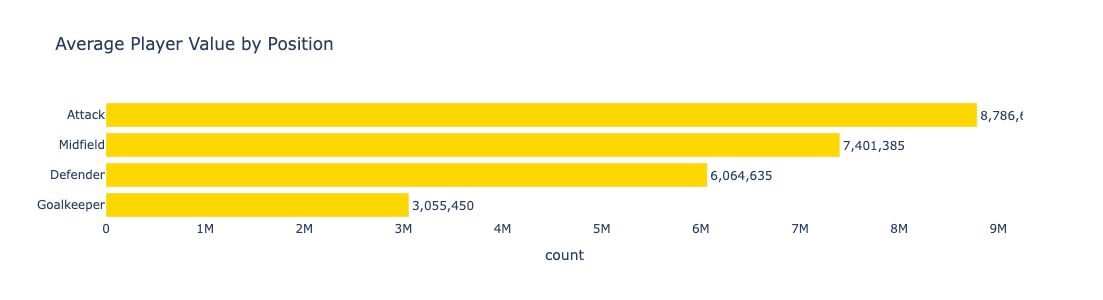

In [149]:
fig = px.bar(value_by_position, x='market_value_in_eur', y=value_by_position.index, 
             title='Average Player Value by Position',
             color=value_by_position.index,
             text='market_value_in_eur',
             color_discrete_sequence=['gold'])  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='count',  
    yaxis_title='',  
    width=800,  
    height=300,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [150]:
# 2023년도만 보면 어떨까?

In [151]:
value_by_position_2023 = players_2023.groupby('position')['market_value_in_eur'].mean()

In [152]:
value_by_position_2023 = pd.DataFrame(value_by_position_2023).sort_values('market_value_in_eur', ascending=False)

In [153]:
value_by_position_2023

market_value_in_eur
position                       
Attack             2.738217e+07
Midfield           2.434690e+07
Defender           1.795519e+07
Goalkeeper         8.114179e+06

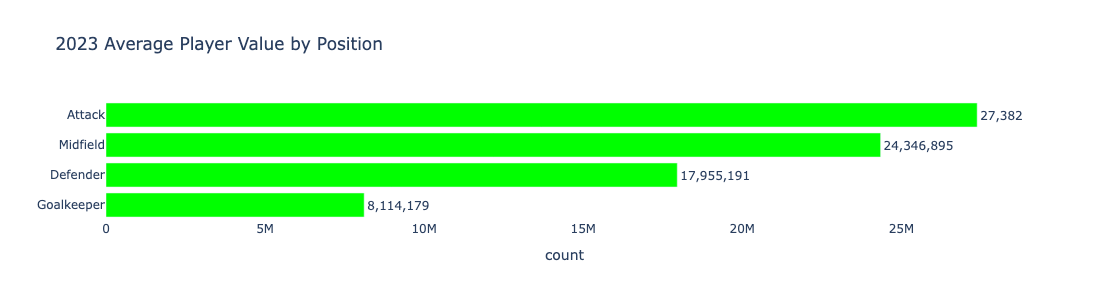

In [154]:
fig = px.bar(value_by_position_2023, x='market_value_in_eur', y=value_by_position_2023.index, 
             title='2023 Average Player Value by Position',
             color=value_by_position_2023.index,
             text='market_value_in_eur',
             color_discrete_sequence=['lime'])  

fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='count',  
    yaxis_title='',  
    width=800,  
    height=300,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [155]:
# 5년동안 프리미어 리그에 랭킹된 클럽 

In [156]:
# 클럽별 외국인 선수 수

In [157]:
# 시즌별 가장 비싼 선수

In [158]:
# 옐로,레드 카드를 가장 많이 받은 선수

In [159]:
# 선수단 크기

In [160]:
# 포지션 별 선수 수